In [ ]:
#General figures codes

In [1]:
# Import packages, initial settings

import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import anndata
import scrublet as scr
import seaborn as sns
import magic
import pybiomart
import six
import sys
sys.modules['sklearn.externals.six'] = six
import scanorama
import harmonypy
import bbknn
import gseapy
from gseapy.plot import barplot, dotplot
import scvelo as scv
import scvi

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300, facecolor='white')
sc.logging.print_version_and_date()
#sc.logging.print_versions()

Global seed set to 0


Running Scanpy 1.8.1, on 2023-05-11 19:31.


In [2]:
adata=sc.read('./Objects/Feb28ObjectRaw.h5ad')
print(adata.shape)

(297473, 36601)


In [5]:
set(adata.obs.fine_grain)

{'AtrialCardiomyocytesCycling',
 'AtrialCardiomyocytesLeft',
 'AtrialCardiomyocytesRight',
 'AtrioventricularNodePacemakerCells',
 'BCells',
 'BCellsMS4A1pos',
 'ChromaffinCells',
 'CoronaryArterialEndothelialCells',
 'CoronaryCapillaryEndothelialCells',
 'CoronaryPericytes',
 'CoronarySmoothMuscleCells',
 'CoronaryVenousEndothelialCells',
 'CoronaryVesselAdventitialFibroblasts',
 'DendriticCellsMature',
 'DendriticCellsType1',
 'DuctusArteriosusSmoothMuscleCells',
 'EndocardialCells',
 'EndocardialCushionCells',
 'EpicardiumDerivedCells',
 'GreatVesselAdventitialFibroblasts',
 'GreatVesselArterialEndothelialCells',
 'GreatVesselSmoothMuscleCells',
 'GreatVesselVenousEndothelialCells',
 'InnateLymphoidCells',
 'LymphNodeFibroblasticReticularCells',
 'LymphaticEndothelialCells',
 'MacrophagesATF3pos',
 'MacrophagesCX3CR1pos',
 'MacrophagesLYVE1pos',
 'MacrophagesTIMD4pos',
 'MastCells',
 'Megakaryocytes',
 'MesothelialEpicardialCells',
 'MonocyteDerivedCells',
 'Monocytes',
 'MonocytesM

In [3]:
cell_cycle_genes = ['MCM5','PCNA','TYMS','FEN1','MCM2','MCM4','RRM1','UNG','GINS2','MCM6','CDCA7','DTL','PRIM1','UHRF1','MLF1IP','HELLS','RFC2','RPA2','NASP','RAD51AP1','GMNN','WDR76','SLBP','CCNE2','UBR7','POLD3','MSH2','ATAD2','RAD51','RRM2','CDC45','CDC6','EXO1','TIPIN','DSCC1','BLM','CASP8AP2','USP1','CLSPN','POLA1','CHAF1B','BRIP1','E2F8','HMGB2','CDK1','NUSAP1','UBE2C','BIRC5','TPX2','TOP2A','NDC80','CKS2','NUF2','CKS1B','MKI67','TMPO','CENPF','TACC3','FAM64A','SMC4','CCNB2','CKAP2L','CKAP2','AURKB','BUB1','KIF11','ANP32E','TUBB4B','GTSE1','KIF20B','HJURP','CDCA3','HN1','CDC20','TTK','CDC25C','KIF2C','RANGAP1','NCAPD2','DLGAP5','CDCA2','CDCA8','ECT2','KIF23','HMMR','AURKA','PSRC1','ANLN','LBR','CKAP5','CENPE','CTCF','NEK2','G2E3','GAS2L3','CBX5','CENPA']
s_genes = cell_cycle_genes[:43]
s_genes = [x for x in s_genes if x in adata.var_names]
print('S genes:', s_genes, '\n')
g2m_genes = cell_cycle_genes[43:]
g2m_genes = [x for x in g2m_genes if x in adata.var_names]
print('G2 genes:', g2m_genes, '\n')
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]

hb_genes1 = ['HBB','HBD','HBG1','HBG2','HBE1','HBZ','HBM','HBA2','HBA1', 'HBQ1']
hb_genes1 = [x for x in hb_genes1 if x in adata.var_names]
print('Hemoglobin genes set 1:', hb_genes1, '\n')

hb_genes2 = ['AHSP','GYPA','RHAG','GFI1B','KEL','EPB42','ALAS2','TSPO2','GYPB','GYPE','SPTA1','RHCE','KLF1','RHD','SLC4A1','SNX22','SQSTM1','SOD1','FTH1','MAP1LC3B','SLC25A37','TRIM58','HMBS']
hb_genes2 = [x for x in hb_genes2 if x in adata.var_names]
print('Hemoglobin genes set 2:', hb_genes2, '\n')

mito_genes=['MT-ND1','MT-ND2','MT-CO1','MT-CO2','MT-ATP8','MT-ATP6','MT-CO3','MT-ND3','MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB']
mito_genes = [x for x in mito_genes if x in adata.var_names]
print('Mitochondrial genes:', mito_genes, '\n')

ribo_genes = ['RPLP0','RPLP1','RPLP2','RPL3','RPL3L','RPL4','RPL5','RPL6','RPL7','RPL7A','RPL7L1','RPL8','RPL9','RPL10','RPL10A','RPL10L','RPL11','RPL12','RPL13','RPL13A','RPL14','RPL15','RPL17','RPL18','RPL18A','RPL19','RPL21','RPL22','RPL22L1','RPL23','RPL23A','RPL24','RPL26','RPL26L1','RPL27','RPL27A','RPL28','RPL29','RPL30','RPL31','RPL32','RPL34','RPL35','RPL35A','RPL36','RPL36A','RPL36AL','RPL37','RPL37A','RPL38','RPL39','RPL39L','UBA52','RPL41','RPSA','RPS2','RPS3','RPS3A','RPS4X','RPS4Y1','RPS4Y2','RPS5','RPS6','RPS7','RPS8','RPS9','RPS10','RPS11','RPS12','RPS13','RPS14','RPS15','RPS15A','RPS16','RPS17','RPS18','RPS19','RPS20','RPS21','RPS23','RPS24','RPS25','RPS26','RPS27','RPS27A','RPS27L','RPS28','RPS29','FAU']
ribo_genes = [x for x in ribo_genes if x in adata.var_names]
print('Ribo genes:', ribo_genes, '\n')

stress_genes=['FOS','FOSB','JUN','JUNB','JUND','ZFP36','SOCS3','CEBPD','CEBPB','ATF3','EGR1','HSPA1A','HSPA1B','HSP90AA1','HSP90AB1','HSPA8','HSPB1','HSPE1','IER3','IER2','BTG1','BTG2','DUSP1']
stress_genes = [x for x in stress_genes if x in adata.var_names]
print('Tissue dissociation stress associated genes:', stress_genes, '\n')

FoxProteins=['FOXA1','FOXA2','FOXA3','FOXB1','FOXB2','FOXC1','FOXC2','FOXD1','FOXD2','FOXD3','FOXD4','FOXD4L1','FOXD4L3','FOXD4L4','FOXD4L5','FOXD4L6','FOXE1','FOXE3','FOXF1','FOXF2','FOXG1','FOXH1','FOXI1','FOXI2','FOXI3','FOXJ1','FOXJ2','FOXJ3','FOXK1','FOXK2','FOXL1','FOXL2','FOXM1','FOXN1','FOXN2','FOXN3','FOXO1','FOXO3','FOXO4','FOXO6','FOXP1','FOXP2','FOXP3','FOXP4','FOXQ1','FOXR1','FOXR2','FOXS1']
chrY_genes=['SRY', 'RPS4Y1', 'ZFY', 'ZFY-AS1', 'LINC00278', 'PCDH11Y', 'TTTY2B', 'TBL1Y', 'PRKY', 'USP9Y', 'DDX3Y', 'UTY', 'TMSB4Y', 'NLGN4Y', 'TTTY14', 'KDM5D', 'TTTY10', 'EIF1AY', 'PRORY', 'LINC00266-4P']
MembraneProteins1=['AADAT','AAK1','ABCA12','ABCA7','ABCB1','ABCB11','ABCB4','ABCB6','ABCC1','ABCC3','ABCC4','ABCC5','ABCC6','ABCG2','ABHD3','ABI1','ABLIM3','AC004691.2','AC004922.1','AC005324.3','AC005726.1','AC008403.1','AC138696.1','ACIN1','ACKR3','ACLY','ACOT13','ACOT9','ACTN1','ACTR10','ACTR6','ADA','ADAM10','ADAM12','ADAM22','ADAM28','ADAM33','ADAMTS1','ADAMTS2','ADAMTSL4','ADAP1','ADCK5','ADD1','ADD2','ADGRB2','ADGRD1','ADGRG2','ADGRG7','ADGRL2','ADH1A','ADH1B','ADH1C','ADH7','ADK','ADORA1','ADRA1B','ADRM1','ADSS','AFAP1L2','AFDN','AFG1L','AGER','AGRN','AHNAK','AHNAK2','AIFM2','AKAP10','AKAP11','AKAP12','AKR1B10','AKR1B15','AL132780.3','AL139300.1','AL355315.1','AL358113.1','AL645922.1','ALDH3A1','ALK','ALOX15B','ALOXE3','ALPI','ALPP','ALPPL2','ALS2CR12','AMACR','AMDHD1','AMER1','AMER2','AMIGO2','AMOT','AMOTL1','AMOTL2','AMPH','ANK2','ANK3','ANKEF1','ANKFN1','ANKIB1','ANKLE2','ANKRA2','ANKRD13A','ANKRD35','ANKRD42','ANKRD45','ANKS1B','ANO1','ANO10','ANO2','ANO6','ANPEP','ANXA1','ANXA13','ANXA2','ANXA3','AP2M1','APBB1','APBB1IP','APC','APLP1','APMAP','APOC3','APOD','APOLD1','AQP1','AQP10','AQP3','AQP4','AQP5','ARAP1','ARF1','ARHGAP18','ARHGAP19','ARHGAP21','ARHGAP22','ARHGAP23','ARHGAP24','ARHGAP28','ARHGAP29','ARHGAP33','ARHGAP36','ARHGAP40','ARHGAP9','ARHGDIG','ARHGEF1','ARHGEF11','ARHGEF12','ARHGEF15','ARHGEF26','ARHGEF28','ARHGEF40','ARHGEF5','ARID2','ARID4A','ARID5B','ARL13A','ARL15','ARL4C','ARMC12','ARMCX5','ARPC1A','ARPC5','ARRB2','ARRDC4','ARVCF','ASAP1','ASB5','ASGR1','ASGR2','ASH2L','ASIC1','ASIC4','ASPM','ASPSCR1','ATG13','ATG3','ATG7','ATIC','ATOX1','ATP10D','ATP12A','ATP13A3','ATP1B3','ATP23','ATP2B1','ATP2B4','ATP2C2','ATP6V0A2','ATP6V1H','ATP8A2','ATP8B1','ATXN10','ATXN3','ATXN7L3','AVEN','AVPI1','AXIN2','AXL','B2M','B3GALT2','BACE1','BAG3','BAIAP2','BAIAP2L1','BANK1','BASP1','BBOF1','BCAR1','BCAR3','BCL2L12','BCORL1','BCR','BDKRB2','BEND6','BFSP1','BFSP2','BICD2','BIN2','BLNK','BLVRB','BMPR2','BMX','BOC','BOLL','BORCS5','BORCS8-MEF2B','BRK1','BRPF1','BRSK1','BSDC1','BST2','BTK','BTN2A1','BTRC','BUB1B-PAK6','BVES','BZW2','C10orf90','C11orf42','C11orf52','C12orf73','C12orf76','C14orf37','C14orf93','C16orf74','C17orf58','C17orf62','C18orf21','C19orf33','C19orf38','C19orf48','C19orf71','C1orf116','C1orf189','C1orf35','C1orf54','C1orf68','C1orf74','C1QBP','C2orf72','C3orf14','C3orf20','C3orf38','C4orf19','C4orf22','C7orf43','C8orf33','C8orf37','C9orf153','C9orf3','CA14','CA9','CABLES2','CACNA1E','CACNG4','CADM1','CALCRL','CALD1','CALML5','CALN1','CAMK2A','CAMK2B','CAMK2D','CAMK2G','CAP2','CAPS','CASKIN2','CASP4','CAST','CAV3','CAVIN1','CAVIN2','CAVIN3','CAVIN4','CBWD1','CBWD2','CBWD3','CBWD5','CBWD6','CC2D1A','CCBE1','CCDC107','CCDC112','CCDC115','CCDC124','CCDC136','CCDC144NL','CCDC15','CCDC154','CCDC170','CCDC24','CCDC28A','CCDC59','CCDC62','CCDC66','CCDC69','CCDC8','CCDC83','CCDC85C','CCDC93','CCDC97','CCNT2','CCNYL1','CCR3','CCR4','CCT3','CD109','CD163','CD164L2','CD200R1','CD226','CD248','CD274','CD2AP','CD300A','CD300LB','CD33','CD34','CD37','CD38','CD3E','CD3G','CD4','CD44','CD46','CD47','CD48','CD79B','CD81','CD84','CD86','CD8A','CD8B','CD9','CD93','CD99L2','CDAN1','CDC42EP1','CDC42EP3','CDC42EP4','CDC42SE1','CDCA4','CDH1','CDH13','CDH15','CDH17','CDH2','CDH26','CDH3','CDH4','CDH5','CDH6','CDH8','CDIPT','CDK16','CDK5','CDK5RAP2','CDK7','CDRT15','CDV3','CEACAM5','CELSR1','CENPJ','CEP162','CEP295','CEP55','CEP57L1','CEP89','CERCAM','CFAP157','CFAP206','CFAP58','CFAP65','CFB','CFL2','CFLAR','CGN','CGNL1','CHCHD7','CHIC2','CHMP2A','CHRM3','CHRNA1','CHRNA5','CHRNB4','CHRND','CIB1','CIB3','CIP2A','CKAP5','CLCA2','CLCA4','CLCN5','CLCN6','CLDN11','CLDN18','CLDN2','CLDN23','CLDN3','CLDN4','CLDN7','CLDN9','CLEC2A','CLEC4F','CLEC5A','CLECL1','CLIC2','CLIC5','CLTB','CLUL1','CMTM4','CMTM7','CMTR2','CMYA5','CNGA1','CNKSR2','CNNM1','CNNM4','CNP','CNR1','CNTD1','COBL','COBLL1','COG3','COL16A1','COL17A1','COL4A5','COL6A2','COLEC12','COLQ','COMMD4','COMTD1','COPRS','COQ7','CORIN','CORO1B','CORO2A','CORO2B','COX6B2','CPEB3','CPPED1','CPZ','CRB3','CREB5','CRIP1','CRIP2','CRK','CRLF3','CROCC','CRTC1','CRYAB','CRYBG3','CRYL1','CSDE1','CSF1','CSF1R','CSPG4','CST6','CTNNA1','CTNNB1','CTNNBIP1','CTNND1','CTNND2','CTSF','CTSV','CTTN','CTXN1','CUEDC1','CUTA','CX3CL1','CX3CR1','CXADR','CXCR2','CYB5D2','CYBRD1','CYFIP2','CYP20A1','CYP24A1','CYTH2','CYTH4','DAAM1','DAB2','DAG1','DAGLB','DAW1','DBN1','DCAF13','DCAF16','DCBLD2','DCHS1','DCHS2','DCP2','DCT','DCTN6','DCUN1D2','DDAH1','DDB2','DDIAS','DDIT4L','DDR1','DDR2','DDX58','DDX60L','DENND6B','DFFA','DGKG','DGKH','DHDDS','DHPS','DHRS7B','DIAPH1','DIAPH3','DIO2','DIS3L','DLG1','DLG2','DLG5','DLGAP3','DLL3','DMWD','DNAAF1','DNAAF4','DNAH17','DNAJA4','DNAJB13','DNAJB4','DNAJC18','DNAJC5','DNAJC6','DNAJC9','DOC2A','DOCK4','DOK3','DONSON','DPEP1','DPH1','DPPA5','DPYSL2','DQX1','DRD1','DRP2','DSC3','DSEL','DSG2','DSP','DTNA','DUS1L','DUSP15','DXO','DYSF','ECSCR','EDA2R','EDNRA','EDNRB','EEF1AKMT1','EEF2','EFCAB1','EFCAB11','EFCAB2','EFCAB7','EFHC2','EFNB1','EFR3A','EFR3B','EGFR','EHBP1','EHD1','EHD2','EHD3','EHD4','EIF2B2','EIF5','EIF5B','ELFN1','ELMO3','ELN','ELOC','EMP3','ENAH','ENC1','ENG','ENKD1','ENO1','ENO2','ENO3','ENOX1','ENOX2','EPB41','EPB41L1','EPB41L2','EPB41L3','EPB41L4A','EPB41L4B','EPB41L5','EPCAM','EPHA2','EPHA3','EPHB1','EPHB2','EPN1','EPOR','EPS8L2','ERAP1','ERBB2','ERBB3','ERBIN','ERC1','ERCC4','ERMN','ESCO2','ETNK1','ETS2','EVA1A','EVI2B','EXOC1','EXOC3L1','EXOC7','EZR','F11R','F2RL1','F2RL3','FAAP20','FABP2','FABP3','FABP5','FAIM','FAM126A','FAM126B','FAM129A','FAM129B','FAM13A','FAM163B','FAM171A1','FAM193A','FAM205A','FAM210B','FAM222A','FAM45A','FAM47E','FAM47E-STBD1','FAM72A','FAM72B','FAM72C','FAM72D','FANCG','FAS','FASN','FBLIM1','FBLN2','FBLN5','FBLN7','FBP2','FBRSL1','FBXL2','FBXO16','FBXO38','FBXO41','FBXW11','FCAR','FCGBP','FCGR1A','FCGR1B','FCGR2A','FCHSD2','FFAR4','FGD1','FGD5','FGFR2','FGR','FHIT','FHL1','FIBCD1','FIGN','FILIP1','FILIP1L','FKBP2','FLAD1','FLCN','FLNA','FLNB','FLNC','FLOT1','FLOT2','FLRT3','FLT1','FLT4','FLVCR1','FMN2','FMNL2','FMNL3','FNBP1','FOXA2','FOXN3','FP565260.3','FRMD3','FRMD7','FRMD8','FRS2','FSCN1','FTCD','FUT2','FXYD3','FYB1','FYN','FZD1','FZD2','FZD4','FZD6','GAB1','GAB2','GABRA1','GABRA2','GABRA3','GABRA5','GABRG1','GAD1','GADL1','GAGE1','GAGE10','GAGE12C','GAGE12D','GAGE12E','GAGE12F','GAGE12G','GAGE12H','GAGE12J','GAGE13','GAGE2A','GAGE2E','GALNT10','GALR1','GAP43','GAPDH','GAPT','GAPVD1','GAS2','GAS2L1','GAS7','GAS8','GBP4','GCA','GCC1','GCLM','GCSAML-AS1','GFI1B','GFOD1','GFRA3','GHR','GID8','GINM1','GIPC1','GJA1','GJB3','GJB4','GJB6','GJB7','GJC1','GJC2','GLO1','GLP2R','GLRX','GLUL','GMIP','GNAI2','GNAQ','GNAS','GNB1','GNB2','GNB3','GNB4','GNG2','GP9','GPAT3','GPATCH1','GPBP1','GPBP1L1','GPC1','GPC3','GPC4','GPI','GPR1','GPR142','GPR156','GPR157','GPR160','GPR173','GPR20','GPR27','GPR50','GPR63','GPRC5A','GPRIN1','GPRIN2','GPX8','GRAMD1A','GRAMD1B','GRAMD1C','GRAP2','GRB7','GRID2IP','GRIK5','GRK3','GRK5','GRPR','GSDMA','GTF2F1','GTSE1','GUCA1A','GYPA','GYPC','HAPLN3','HARBI1','HAS1','HAUS4','HAUS7','HCAR2','HCAR3','HCFC2','HCK','HCLS1','HCST','HDAC8','HEG1','HELZ','HENMT1','HERC2','HERPUD1','HFE','HIF1A','HIF3A','HINT1','HIP1R','HLA-A','HLA-DPB1','HMGCS1','HMOX1','HOMER3','HOXC5','HOXD4','HPS3','HRASLS5','HRH1','HS6ST3','HSH2D','HSPB1','HSPG2','HTR1B','HTR7','HTRA1','HUNK','HYDIN','HYI','HYLS1','ICAM1','ICAM2','ICOS','ICOSLG','IFFO2','IFIT5','IFNGR1','IFRD1','IFT122','IGFL2','IGSF11','IGSF23','IKZF5','IL10RA','IL12RB1','IL12RB2','IL13','IL13RA2','IL16','IL17RB','IL1R1','IL1RL1','IL21R','IL4R','IL6ST','IL7R','ILDR2','ILK','INPP5A','INSR','INTS12','IP6K2','IPCEF1','IQGAP1','IQGAP2','IREB2','IRF2','IRS1','ISLR','ITGA2B','ITGA3','ITGA4','ITGA7','ITGA8','ITGA9','ITGB1','ITGB2','ITGB3','ITGB4','ITGB5','ITGB6','ITGB7','ITGB8','ITK','ITM2A','ITPKA','ITSN1','ITSN2','IYD','JAG1','JAK2','JAK3','JAM2','JAML','JCAD','JMJD4','JPT2','JUP','KANK1','KANK3','KANSL2','KARS','KATNB1','KCNAB1','KCNB2','KCNH8','KCNJ15','KCNK13','KCNK17','KCNK6','KCNK7','KCNK9','KCNN2','KCNS3','KCNU1','KDF1','KDR','KEL','KIAA0556','KIAA0895','KIAA1324','KIAA1522','KIAA1958','KIF17','KIF19','KIF21A','KIF21B','KIF26A','KIF26B','KISS1R','KIT','KLC1','KLC2','KLF9','KLHDC7B','KLHL41','KLHL6','KLHL7','KLK7','KLRC1','KLRC2','KLRF1','KLRK1','KMT2D','KNDC1','KNSTRN','KNTC1','KPTN','KRT75','KRT77','KRTAP25-1','L1CAM','L3MBTL1','LAIR1','LAMA4','LAMC1','LAMP2','LAMTOR1','LAPTM4A','LASP1','LAT','LAT2','LAX1','LCP1','LCTL','LDB2','LDLRAD3','LENG1','LGALS3','LGALS4','LGALS8','LGR6','LHFPL2','LHX6','LIMA1','LINGO1','LIPJ','LMCD1','LMOD2','LMTK2','LMTK3','LNX1','LNX2','LONRF1','LONRF3','LOXHD1','LPAR1','LPAR3','LPAR4','LPIN1','LPIN2','LRCH2','LRP11','LRP12','LRRC15','LRRC26','LRRC34','LRRC45','LRRC69','LRRC7','LRRC9','LRRFIP2','LRRIQ3','LSMEM2','LSR','LTB4R2','LUZP2','LY6K','LYN','LYPD1','LYST','LZTS1','LZTS2','MACF1','MADD','MAGI1','MAGI3','MAMDC2','MAP1S','MAP2','MAP2K1','MAP2K4','MAP2K7','MAP3K12','MAP3K21','MAP3K6','MAP3K7','MAP4','MAP4K1','MAP4K5','MAP6','MAPK15','MAPK8IP1','MAPT','MARCH10','MARCH7','MARCKS','MARK2','MARVELD2','MAS1L','MAT2B','MBP','MC5R','MCAM','MCEMP1','MCF2L2','MCMBP','MCTS1','MDGA1','ME1','MEF2B','MEIOC','MEPCE','MERTK','MET','METAP1','METAP2','METTL15','METTL25','METTL9','MFAP3L','MFSD1','MFSD2A','MGAT4C','MIB1','MICAL2','MICAL3','MICALL1','MICB','MIEN1','MIGA2','MISP','MKLN1','MKRN3','MLF2','MLKL','MLST8','MMACHC','MMP10','MMP15','MMP24','MMP25','MOAP1','MPHOSPH8','MPHOSPH9','MPI','MPIG6B','MPL','MPP1','MPP5','MPP7','MPZL1','MPZL2','MR1','MRGPRF','MRNIP','MRPL42','MRPL44','MRPL46','MRPS18B','MS4A1','MS4A12','MS4A14','MS4A15','MSN','MSRA','MTCP1','MTFR1L','MTHFR','MTM1','MTPN','MTSS1','MUC1','MUC20','MVD','MYH11','MYH9','MYL4','MYLK','MYO10','MYO1B','MYO1C','MYO1E','MYO1G','MYO3A','MYO5B','MYO9A','MYOF','N4BP2','NAA35','NAB1','NAIF1','NAMPT','NAP1L2','NAPG','NARFL','NCAM1','NCAM2','NCK1','NCKAP1L','NCKAP5','NCKIPSD','NCOA1','NCS1','NDC1','NECTIN2','NECTIN3','NECTIN4','NEDD1','NEDD9','NEO1','NEU1','NEXN','NF2','NFE2L2','NFKBID','NGEF']
MembraneProteins2=['NGFR','NHS','NHSL2','NID2','NINJ2','NKTR','NKX2-8','NLGN1','NLGN3','NLK','NLRX1','NMB','NMBR','NME1','NME2','NMT1','NMT2','NMUR2','NOS1','NOTCH2','NPFFR2','NPL','NPNT','NPR1','NPTN','NPTXR','NR2C1','NRAS','NRCAM','NRP2','NRSN1','NRXN1','NSD1','NSFL1C','NT5E','NTNG1','NTNG2','NTSR1','NUDCD3','NUDT16L1','NUDT9','NUMB','NUP35','NUS1','OAS3','OBSCN','OCA2','OCLN','OCM','OCM2','ODC1','ODR4','OGT','OLFM4','OLIG2','OLR1','OPHN1','OPRK1','OR10P1','OR1N2','OR2C3','OR6B2','OR6B3','OR6C6','OR8S1','OSBPL10','OSBPL6','OSBPL7','OSCAR','OSCP1','OSGEP','OSR2','OTOP2','OTULIN','OXGR1','P3H3','PACSIN2','PACSIN3','PAFAH1B2','PAG1','PAIP1','PAK1','PAK4','PAK6','PALLD','PALM','PALM2','PALM2-AKAP2','PALM3','PALMD','PANX1','PANX2','PAQR8','PARD3','PARD3B','PARD6A','PARD6G','PARP6','PATJ','PAWR','PCBD2','PCDH1','PCDH17','PCDH7','PCDHA1','PCDHA11','PCDHA12','PCDHA4','PCDHA5','PCDHB1','PCDHB11','PCDHB12','PCDHB16','PCDHB4','PCDHB5','PCDHGA1','PCDHGA10','PCDHGA11','PCDHGA12','PCDHGA2','PCDHGA3','PCDHGA4','PCDHGA5','PCDHGA6','PCDHGA7','PCDHGA8','PCDHGA9','PCDHGB1','PCDHGB2','PCDHGB3','PCDHGB4','PCDHGB5','PCDHGB6','PCDHGB7','PCDHGC3','PCDHGC4','PCDHGC5','PCLO','PCMTD1','PDAP1','PDCD7','PDE3A','PDE4A','PDE4D','PDE9A','PDGFC','PDGFRA','PDHX','PDLIM1','PDLIM5','PDPN','PDZD2','PDZD8','PEAR1','PEBP1','PFDN1','PGAP3','PGLYRP2','PGLYRP4','PGRMC2','PHACTR1','PHACTR4','PHF20L1','PHGDH','PHLDB2','PHLDB3','PHOSPHO1','PHPT1','PI3','PI4K2A','PI4KA','PIEZO2','PIGB','PIGN','PIGW','PIGX','PIK3AP1','PIK3CG','PIK3R6','PIP4K2A','PIP4K2C','PIP5K1A','PIRT','PITPNM3','PKD2L2','PKN1','PKN2','PKP1','PKP2','PKP3','PKP4','PLAA','PLAUR','PLCB1','PLCB2','PLCD3','PLCD4','PLEKHA4','PLEKHA6','PLEKHA7','PLEKHG3','PLEKHG4','PLEKHG6','PLEKHH2','PLEKHO2','PLIN4','PLPP1','PLPPR5','PLS3','PLSCR1','PLVAP','PLXNA3','PLXNA4','PNCK','PNISR','PODXL','POLE','POU2F3','PPEF1','PPFIBP1','PPIP5K1','PPL','PPM1A','PPM1F','PPP1CA','PPP1CB','PPP1R12B','PPP1R16A','PPP1R16B','PPP1R18','PPP1R27','PPP1R9A','PPP2R1B','PPP3R1','PPP3R2','PPP4C','PPP6R3','PPTC7','PRAME','PRC1','PRDX6','PRIMA1','PRKCA','PRKCE','PRKCH','PRKCZ','PRKD1','PROM2','PROSER2','PRR15','PRR32','PRR7','PRRC2A','PRRG1','PRRT2','PRRT3','PRRT4','PRTG','PRX','PSCA','PSD','PSD2','PSEN1','PSMC5','PSMC6','PSMD9','PSTPIP2','PTAFR','PTCHD4','PTK2B','PTK6','PTPN12','PTPN21','PTPN22','PTPN4','PTPRB','PTPRG','PTPRK','PTPRM','PTPRR','PTPRS','PTX3','PURG','PVALB','PVR','PXDC1','PXK','PYGL','PYGO2','PYM1','RAB13','RAB23','RAB25','RAB26','RAB27B','RAB3B','RAB3GAP2','RAB43','RAB8A','RABEPK','RAD51C','RAD52','RAI2','RALA','RALGAPA2','RAPGEF2','RAPH1','RAPSN','RASA4','RASA4B','RASAL1','RASAL2','RASAL3','RASD1','RASD2','RASGRP1','RASGRP2','RASGRP4','RASSF2','RASSF3','RASSF4','RBM46','RC3H1','RCCD1','RCSD1','RD3L','RDX','RECK','RELL1','REPS1','RET','RFLNB','RFPL1','RFPL2','RFPL3','RGP1','RGS10','RGS14','RGS19','RGS3','RGS7BP','RGS9BP','RHCE','RHD','RHEX','RHOA','RHOBTB2','RHOJ','RHOXF2','RHOXF2B','RIC8A','RIC8B','RIF1','RILPL1','RIMBP3','RIMBP3B','RIMBP3C','RIMS2','RIOK2','RIOK3','RIPK1','RND1','RNF114','RNF145','RNF146','RNF149','RNF165','RNF166','RNF39','ROBO1','ROBO3','ROBO4','ROM1','RP2','RPE','RPEL1','RPGRIP1L','RPIA','RPL36A','RPL36A-HNRNPH2','RPL36AL','RPSA','RPUSD1','RRAD','RRP12','RRP7A','RSBN1L','RSC1A1','RSPH3','RTL3','RTL4','RTN4R','RTN4RL1','RYR2','S100A13','S100A14','S100A16','S100A2','S100A3','S100A4','S100A6','S100A9','SAMD4A','SAMHD1','SAMSN1','SAPCD1','SASH3','SC5D','SCAMP1','SCAMP4','SCEL','SCHIP1','SCIN','SCN1A','SCN5A','SCN8A','SCN9A','SCNN1D','SCNN1G','SCRIB','SCUBE3','SDC2','SDC4','SDE2','SDHB','SEC16B','SEMA3C','SEMA3D','SEMA4B','SEMA4F','SEMA6C','SEMA6D','SEPT2','SEPT3','SERINC2','SERINC5','SERPINB3','SFSWAP','SGCE','SGK494','SH3BGR','SH3D21','SHANK1','SHANK3','SHARPIN','SHISA6','SHKBP1','SHROOM2','SHTN1','SIGLEC10','SIGLEC14','SIGLEC6','SIGLEC7','SIN3B','SIPA1','SIPA1L1','SIPA1L3','SKAP1','SLAMF6','SLC10A5','SLC12A2','SLC13A3','SLC13A5','SLC14A1','SLC16A1','SLC16A10','SLC16A2','SLC16A3','SLC16A7','SLC16A9','SLC17A5','SLC19A1','SLC19A3','SLC1A5','SLC1A6','SLC22A16','SLC23A3','SLC24A4','SLC26A9','SLC27A1','SLC28A1','SLC2A1','SLC2A11','SLC2A12','SLC2A14','SLC2A2','SLC2A3','SLC30A1','SLC31A2','SLC34A1','SLC34A2','SLC35F5','SLC35G2','SLC36A4','SLC38A5','SLC38A6','SLC38A7','SLC39A10','SLC39A14','SLC39A2','SLC39A6','SLC3A2','SLC40A1','SLC41A3','SLC43A1','SLC43A3','SLC44A2','SLC45A4','SLC46A1','SLC46A3','SLC4A1AP','SLC4A2','SLC4A7','SLC4A8','SLC5A12','SLC5A3','SLC5A6','SLC5A7','SLC6A6','SLC7A14','SLC7A2','SLC7A5','SLC7A6','SLC8A1','SLC9A1','SLC9A2','SLC9A3','SLC9A3R1','SLC9A3R2','SLC9A4','SLC9A5','SLC9B2','SLC9C2','SLCO1A2','SLCO1B3','SLCO4A1','SLCO4C1','SLCO5A1','SLIT1','SLIT3','SLITRK6','SLK','SLX4','SMAGP','SMAP1','SMOC1','SMPD2','SMPX','SNAP23','SNAP25','SNRK','SNTB2','SNTG2','SNX15','SNX32','SNX9','SOCS3','SOCS5','SOD1','SORBS1','SORCS1','SORT1','SOX11','SPAG16','SPANXN4','SPART','SPATA12','SPATC1L','SPERT','SPG11','SPHK1','SPINK13','SPINT1','SPINT2','SPN','SPPL2B','SPPL3','SPRED3','SPRYD3','SPTBN2','SRC','SRCIN1','SRD5A3','SRPK1','SRPRB','SRRM3','SSFA2','SSH1','SSH3','SSTR1','SSTR5','SSX2IP','ST8SIA5','STAB1','STAC','STAC2','STAMBP','STAMBPL1','STARD4','STAT2','STEAP4','STIL','STIP1','STK10','STK16','STK17A','STK17B','STOM','STOML2','STOML3','STX18','STX4','STXBP4','STYK1','SUCLG1','SUCLG2','SUGT1','SUMF2','SUPT6H','SUSD2','SVIL','SWAP70','SYCP2','SYK','SYMPK','SYNC','SYNGR3','SYNPO2L','SYPL2','SYT4','SYTL2','SYVN1','TACC2','TACR2','TACSTD2','TASP1','TAZ','TBC1D10A','TBC1D2','TBC1D24','TBC1D30','TBC1D9B','TBXA2R','TCAF2','TCAF2C','TCHP','TCIM','TDG','TDO2','TDP1','TEC','TEDC2','TEK','TES','TEX14','TEX9','TGFBR1','TGFBR2','TGM1','TGM2','THBS1','THBS2','THEGL','THY1','TIAM1','TICAM1','TIGD7','TIMD4','TJP1','TJP2','TJP3','TLN1','TLR4','TM2D2','TM4SF20','TM4SF4','TM4SF5','TMC5','TMED8','TMEM101','TMEM107','TMEM108','TMEM121B','TMEM139','TMEM141','TMEM164','TMEM176B','TMEM183A','TMEM186','TMEM2','TMEM218','TMEM222','TMEM229A','TMEM245','TMEM251','TMEM254','TMEM258','TMEM266','TMEM268','TMEM50A','TMEM63B','TMPRSS15','TMPRSS2','TMTC2','TNFRSF10D','TNFRSF11A','TNFRSF12A','TNFRSF21','TNFRSF25','TNFRSF8','TNFRSF9','TNFSF13B','TNK1','TNKS1BP1','TNNI2','TOGARAM2','TOLLIP','TOM1','TP53BP2','TPD52L1','TPRN','TRAF7','TRAIP','TRAPPC13','TRAT1','TRDN','TREML1','TRIB1','TRIM16','TRIM16L','TRIM38','TRIM4','TRIM44','TRIM54','TRIM71','TRIML2','TRIP6','TRMT1','TRMT10B','TRMT13','TRMT6','TRO','TRPM1','TRPM4','TRPM7','TRPV2','TRPV3','TSG101','TSGA13','TSHZ3','TSPAN15','TSPAN6','TSPO2','TSR2','TSSK4','TTC17','TTC23','TTC7B','TTLL12','TTLL5','TULP3','TWF2','TXNDC11','TXNIP','TYROBP','TYW3','UAP1','UBA3','UBA52','UBAC1','UBALD1','UBAP1','UBASH3B','UBE2A','UBE2B','UBE2C','UBE2D1','UBE2D2','UBE2D3','UBE2D4','UBE2K','UBE2QL1','UBE2S','UBE3C','UBQLN2','UBR2','UBTD1','UCP3','ULBP1','ULBP2','UNC5A','UNC79','UQCC1','USP14','USP15','USP2','USP20','USP21','USP4','USP53','UTP20','UTRN','VAMP5','VAMP8','VANGL1','VASP','VCAM1','VCPIP1','VIL1','VPS13B','VPS36','VPS50','VPS8','VSIG4','VTCN1','VWA5B1','VWA7','WAS','WASF2','WBP4','WDFY3','WDPCP','WDR1','WDR12','WDR13','WDR53','WDR6','WDR66','WIPF1','WWP1','XIAP','XIRP1','XIRP2','XPC','XPNPEP2','XPO6','XRN1','XYLT1','YES1','YIPF1','YIPF4','YOD1','YTHDC1','ZBED3','ZBTB33','ZBTB8OS','ZDHHC2','ZDHHC20','ZDHHC22','ZDHHC5','ZFP41','ZFP90','ZFYVE28','ZGPAT','ZMYND10','ZNF10','ZNF18','ZNF185','ZNF2','ZNF20','ZNF227','ZNF229','ZNF236','ZNF276','ZNF277','ZNF337','ZNF397','ZNF407','ZNF497','ZNF503','ZNF510','ZNF536','ZNF571','ZNF598','ZNF599','ZNF646','ZNF655','ZNF688','ZNF706','ZNF717','ZNF783','ZNF79','ZNF839','ZSCAN22','ZSCAN29','ZSWIM1','ZSWIM8','ZYX']
MembraneProteins=MembraneProteins1+MembraneProteins2

TFs1=['AC008770.3','AC023509.3','AC092835.1','AC138696.1','ADNP','ADNP2','AEBP1','AEBP2','AHCTF1','AHDC1','AHR','AHRR','AIRE','AKAP8','AKAP8L','AKNA','ALX1','ALX3','ALX4','ANHX','ANKZF1','AR','ARGFX','ARHGAP35','ARID2','ARID3A','ARID3B','ARID3C','ARID5A','ARID5B','ARNT','ARNT2','ARNTL','ARNTL2','ARX','ASCL1','ASCL2','ASCL3','ASCL4','ASCL5','ASH1L','ATF1','ATF2','ATF3','ATF4','ATF5','ATF6','ATF6B','ATF7','ATMIN','ATOH1','ATOH7','ATOH8','BACH1','BACH2','BARHL1','BARHL2','BARX1','BARX2','BATF','BATF2','BATF3','BAZ2A','BAZ2B','BBX','BCL11A','BCL11B','BCL6','BCL6B','BHLHA15','BHLHA9','BHLHE22','BHLHE23','BHLHE40','BHLHE41','BNC1','BNC2','BORCS8-MEF2B','BPTF','BRF2','BSX','C11orf95','CAMTA1','CAMTA2','CARF','CASZ1','CBX2','CC2D1A','CCDC169-SOHLH2','CCDC17','CDC5L','CDX1','CDX2','CDX4','CEBPA','CEBPB','CEBPD','CEBPE','CEBPG','CEBPZ','CENPA','CENPB','CENPBD1','CENPS','CENPT','CENPX','CGGBP1','CHAMP1','CHCHD3','CIC','CLOCK','CPEB1','CPXCR1','CREB1','CREB3','CREB3L1','CREB3L2','CREB3L3','CREB3L4','CREB5','CREBL2','CREBZF','CREM','CRX','CSRNP1','CSRNP2','CSRNP3','CTCF','CTCFL','CUX1','CUX2','CXXC1','CXXC4','CXXC5','DACH1','DACH2','DBP','DBX1','DBX2','DDIT3','DEAF1','DLX1','DLX2','DLX3','DLX4','DLX5','DLX6','DMBX1','DMRT1','DMRT2','DMRT3','DMRTA1','DMRTA2','DMRTB1','DMRTC2','DMTF1','DNMT1','DNTTIP1','DOT1L','DPF1','DPF3','DPRX','DR1','DRAP1','DRGX','DUX1','DUX3','DUX4','DUXA','DZIP1','E2F1','E2F2','E2F3','E2F4','E2F5','E2F6','E2F7','E2F8','E4F1','EBF1','EBF2','EBF3','EBF4','EEA1','EGR1','EGR2','EGR3','EGR4','EHF','ELF1','ELF2','ELF3','ELF4','ELF5','ELK1','ELK3','ELK4','EMX1','EMX2','EN1','EN2','EOMES','EPAS1','ERF','ERG','ESR1','ESR2','ESRRA','ESRRB','ESRRG','ESX1','ETS1','ETS2','ETV1','ETV2','ETV3','ETV3L','ETV4','ETV5','ETV6','ETV7','EVX1','EVX2','FAM170A','FAM200B','FBXL19','FERD3L','FEV','FEZF1','FEZF2','FIGLA','FIZ1','FLI1','FLYWCH1','FOS','FOSB','FOSL1','FOSL2','FOXA1','FOXA2','FOXA3','FOXB1','FOXB2','FOXC1','FOXC2','FOXD1','FOXD2','FOXD3','FOXD4','FOXD4L1','FOXD4L3','FOXD4L4','FOXD4L5','FOXD4L6','FOXE1','FOXE3','FOXF1','FOXF2','FOXG1','FOXH1','FOXI1','FOXI2','FOXI3','FOXJ1','FOXJ2','FOXJ3','FOXK1','FOXK2','FOXL1','FOXL2','FOXM1','FOXN1','FOXN2','FOXN3','FOXN4','FOXO1','FOXO3','FOXO4','FOXO6','FOXP1','FOXP2','FOXP3','FOXP4','FOXQ1','FOXR1','FOXR2','FOXS1','GABPA','GATA1','GATA2','GATA3','GATA4','GATA5','GATA6','GATAD2A','GATAD2B','GBX1','GBX2','GCM1','GCM2','GFI1','GFI1B','GLI1','GLI2','GLI3','GLI4','GLIS1','GLIS2','GLIS3','GLMP','GLYR1','GMEB1','GMEB2','GPBP1','GPBP1L1','GRHL1','GRHL2','GRHL3','GSC','GSC2','GSX1','GSX2','GTF2B','GTF2I','GTF2IRD1','GTF2IRD2','GTF2IRD2B','GTF3A','GZF1','HAND1','HAND2','HBP1','HDX','HELT','HES1','HES2','HES3','HES4','HES5','HES6','HES7','HESX1','HEY1','HEY2','HEYL','HHEX','HIC1','HIC2','HIF1A','HIF3A','HINFP','HIVEP1','HIVEP2','HIVEP3','HKR1','HLF','HLX','HMBOX1','HMG20A','HMG20B','HMGA1','HMGA2','HMGN3','HMX1','HMX2','HMX3','HNF1A','HNF1B','HNF4A','HNF4G','HOMEZ','HOXA1','HOXA10','HOXA11','HOXA13','HOXA2','HOXA3','HOXA4','HOXA5','HOXA6','HOXA7','HOXA9','HOXB1','HOXB13','HOXB2','HOXB3','HOXB4','HOXB5','HOXB6','HOXB7','HOXB8','HOXB9','HOXC10','HOXC11','HOXC12','HOXC13','HOXC4','HOXC5','HOXC6','HOXC8','HOXC9','HOXD1','HOXD10','HOXD11','HOXD12','HOXD13','HOXD3','HOXD4','HOXD8','HOXD9','HSF1','HSF2','HSF4','HSF5','HSFX1','HSFX2','HSFY1','HSFY2','IKZF1','IKZF2','IKZF3','IKZF4','IKZF5','INSM1','INSM2','IRF1','IRF2','IRF3','IRF4','IRF5','IRF6','IRF7','IRF8','IRF9','IRX1','IRX2','IRX3','IRX4','IRX5','IRX6','ISL1','ISL2','ISX','JAZF1','JDP2','JRK','JRKL','JUN','JUNB','JUND','KAT7','KCMF1','KCNIP3','KDM2A','KDM2B','KDM5B','KIN','KLF1','KLF10','KLF11','KLF12','KLF13','KLF14','KLF15','KLF16','KLF17','KLF2','KLF3','KLF4','KLF5','KLF6','KLF7','KLF8','KLF9','KMT2A','KMT2B','L3MBTL1','L3MBTL3','L3MBTL4','LBX1','LBX2','LCOR','LCORL','LEF1','LEUTX','LHX1','LHX2','LHX3','LHX4','LHX5','LHX6','LHX8','LHX9','LIN28A','LIN28B','LIN54','LMX1A','LMX1B','LTF','LYL1','MAF','MAFA','MAFB','MAFF','MAFG','MAFK','MAX','MAZ','MBD1','MBD2','MBD3','MBD4','MBD6','MBNL2','MECOM','MECP2','MEF2A','MEF2B','MEF2C','MEF2D','MEIS1','MEIS2','MEIS3','MEOX1','MEOX2','MESP1','MESP2','MGA','MITF','MIXL1','MKX','MLX','MLXIP','MLXIPL','MNT','MNX1','MSANTD1','MSANTD3','MSANTD4','MSC','MSGN1','MSX1','MSX2','MTERF1','MTERF2','MTERF3','MTERF4','MTF1','MTF2','MXD1','MXD3','MXD4','MXI1','MYB','MYBL1','MYBL2','MYC','MYCL','MYCN','MYF5','MYF6','MYNN','MYOD1','MYOG','MYPOP','MYRF','MYRFL','MYSM1','MYT1','MYT1L','MZF1','NACC2','NAIF1','NANOG','NANOGNB','NANOGP8','NCOA1','NCOA2','NCOA3','NEUROD1','NEUROD2','NEUROD4','NEUROD6','NEUROG1','NEUROG2','NEUROG3','NFAT5','NFATC1','NFATC2','NFATC3','NFATC4','NFE2','NFE2L1','NFE2L2','NFE2L3','NFE4','NFIA','NFIB','NFIC','NFIL3','NFIX','NFKB1','NFKB2','NFX1','NFXL1','NFYA','NFYB','NFYC','NHLH1','NHLH2','NKRF','NKX1-1','NKX1-2','NKX2-1','NKX2-2','NKX2-3','NKX2-4','NKX2-5','NKX2-6','NKX2-8','NKX3-1','NKX3-2','NKX6-1','NKX6-2','NKX6-3','NME2','NOBOX','NOTO','NPAS1','NPAS2','NPAS3','NPAS4','NR0B1','NR1D1','NR1D2','NR1H2','NR1H3','NR1H4','NR1I2','NR1I3','NR2C1','NR2C2','NR2E1','NR2E3','NR2F1','NR2F2','NR2F6','NR3C1','NR3C2','NR4A1','NR4A2','NR4A3','NR5A1','NR5A2','NR6A1','NRF1','NRL','OLIG1','OLIG2','OLIG3','ONECUT1','ONECUT2','ONECUT3','OSR1','OSR2','OTP','OTX1','OTX2','OVOL1','OVOL2','OVOL3','PA2G4','PATZ1','PAX1','PAX2','PAX3','PAX4','PAX5','PAX6','PAX7','PAX8','PAX9','PBX1','PBX2','PBX3','PBX4','PCGF2','PCGF6','PDX1','PEG3','PGR','PHF1','PHF19 ','PHF20','PHF21A','PHOX2A','PHOX2B','PIN1','PITX1','PITX2','PITX3','PKNOX1','PKNOX2','PLAG1','PLAGL1','PLAGL2','PLSCR1','POGK','POU1F1','POU2AF1','POU2F1','POU2F2','POU2F3','POU3F1','POU3F2','POU3F3','POU3F4','POU4F1','POU4F2','POU4F3','POU5F1','POU5F1B','POU5F2','POU6F1','POU6F2','PPARA','PPARD','PPARG','PRDM1','PRDM10','PRDM12','PRDM13','PRDM14','PRDM15','PRDM16','PRDM2','PRDM4','PRDM5','PRDM6','PRDM8','PRDM9','PREB','PRMT3','PROP1','PROX1','PROX2','PRR12','PRRX1','PRRX2','PTF1A','PURA','PURB','PURG','RAG1','RARA','RARB','RARG','RAX','RAX2','RBAK','RBCK1','RBPJ','RBPJL','RBSN','REL','RELA','RELB','REPIN1','REST','REXO4','RFX1','RFX2','RFX3','RFX4','RFX5','RFX6','RFX7','RFX8','RHOXF1','RHOXF2','RHOXF2B','RLF','RORA','RORB','RORC','RREB1','RUNX1','RUNX2','RUNX3','RXRA','RXRB','RXRG','SAFB','SAFB2','SALL1','SALL2','SALL3','SALL4','SATB1','SATB2','SCMH1','SCML4','SCRT1','SCRT2','SCX','SEBOX','SETBP1','SETDB1','SETDB2','SGSM2','SHOX','SHOX2','SIM1','SIM2','SIX1','SIX2','SIX3','SIX4','SIX5','SIX6','SKI','SKIL','SKOR1','SKOR2','SLC2A4RG','SMAD1','SMAD3','SMAD4','SMAD5','SMAD9','SMYD3','SNAI1','SNAI2','SNAI3','SNAPC2','SNAPC4','SNAPC5','SOHLH1','SOHLH2','SON','SOX1','SOX10','SOX11']
TFs2=['SOX12','SOX13','SOX14','SOX15','SOX17','SOX18','SOX2','SOX21','SOX3','SOX30','SOX4','SOX5','SOX6','SOX7','SOX8','SOX9','SP1','SP100','SP110','SP140','SP140L','SP2','SP3','SP4','SP5','SP6','SP7','SP8','SP9','SPDEF','SPEN','SPI1','SPIB','SPIC','SPZ1','SRCAP','SREBF1','SREBF2','SRF','SRY','ST18','STAT1','STAT2','STAT3','STAT4','STAT5A','STAT5B','STAT6','T','TAL1','TAL2','TBP','TBPL1','TBPL2','TBR1','TBX1','TBX10','TBX15','TBX18','TBX19','TBX2','TBX20','TBX21','TBX22','TBX3','TBX4','TBX5','TBX6','TCF12','TCF15','TCF20','TCF21','TCF23','TCF24','TCF3','TCF4','TCF7','TCF7L1','TCF7L2','TCFL5','TEAD1','TEAD2','TEAD3','TEAD4','TEF','TERB1','TERF1','TERF2','TET1','TET2','TET3','TFAP2A','TFAP2B','TFAP2C','TFAP2D','TFAP2E','TFAP4','TFCP2','TFCP2L1','TFDP1','TFDP2','TFDP3','TFE3','TFEB','TFEC','TGIF1','TGIF2','TGIF2LX','TGIF2LY','THAP1','THAP10','THAP11','THAP12','THAP2','THAP3','THAP4','THAP5','THAP6','THAP7','THAP8','THAP9','THRA','THRB','THYN1','TIGD1','TIGD2','TIGD3','TIGD4','TIGD5','TIGD6','TIGD7','TLX1','TLX2','TLX3','TMF1','TOPORS','TP53','TP63','TP73','TPRX1','TRAFD1','TRERF1','TRPS1','TSC22D1','TSHZ1','TSHZ2','TSHZ3','TTF1','TWIST1','TWIST2','UBP1','UNCX','USF1','USF2','USF3','VAX1','VAX2','VDR','VENTX','VEZF1','VSX1','VSX2','WIZ','WT1','XBP1','XPA','YBX1','YBX2','YBX3','YY1','YY2','ZBED1','ZBED2','ZBED3','ZBED4','ZBED5','ZBED6','ZBED9','ZBTB1','ZBTB10','ZBTB11','ZBTB12','ZBTB14','ZBTB16','ZBTB17','ZBTB18','ZBTB2','ZBTB20','ZBTB21','ZBTB22','ZBTB24','ZBTB25','ZBTB26','ZBTB3','ZBTB32','ZBTB33','ZBTB34','ZBTB37','ZBTB38','ZBTB39','ZBTB4','ZBTB40','ZBTB41','ZBTB42','ZBTB43','ZBTB44','ZBTB45','ZBTB46','ZBTB47','ZBTB48','ZBTB49','ZBTB5','ZBTB6','ZBTB7A','ZBTB7B','ZBTB7C','ZBTB8A','ZBTB8B','ZBTB9','ZC3H8','ZEB1','ZEB2','ZFAT','ZFHX2','ZFHX3','ZFHX4','ZFP1','ZFP14','ZFP2','ZFP28','ZFP3','ZFP30','ZFP37','ZFP41','ZFP42','ZFP57','ZFP62','ZFP64','ZFP69','ZFP69B','ZFP82','ZFP90','ZFP91','ZFP92','ZFPM1','ZFPM2','ZFX','ZFY','ZGLP1','ZGPAT','ZHX1','ZHX2','ZHX3','ZIC1','ZIC2','ZIC3','ZIC4','ZIC5','ZIK1','ZIM2','ZIM3','ZKSCAN1','ZKSCAN2','ZKSCAN3','ZKSCAN4','ZKSCAN5','ZKSCAN7','ZKSCAN8','ZMAT1','ZMAT4','ZNF10','ZNF100','ZNF101','ZNF107','ZNF112','ZNF114','ZNF117','ZNF12','ZNF121','ZNF124','ZNF131','ZNF132','ZNF133','ZNF134','ZNF135','ZNF136','ZNF138','ZNF14','ZNF140','ZNF141','ZNF142','ZNF143','ZNF146','ZNF148','ZNF154','ZNF155','ZNF157','ZNF16','ZNF160','ZNF165','ZNF169','ZNF17','ZNF174','ZNF175','ZNF177','ZNF18','ZNF180','ZNF181','ZNF182','ZNF184','ZNF189','ZNF19','ZNF195','ZNF197','ZNF2','ZNF20','ZNF200','ZNF202','ZNF205','ZNF207','ZNF208','ZNF211','ZNF212','ZNF213','ZNF214','ZNF215','ZNF217','ZNF219','ZNF22','ZNF221','ZNF222','ZNF223','ZNF224','ZNF225','ZNF226','ZNF227','ZNF229','ZNF23','ZNF230','ZNF232','ZNF233','ZNF234','ZNF235','ZNF236','ZNF239','ZNF24','ZNF248','ZNF25','ZNF250','ZNF251','ZNF253','ZNF254','ZNF256','ZNF257','ZNF26','ZNF260','ZNF263','ZNF264','ZNF266','ZNF267','ZNF268','ZNF273','ZNF274','ZNF275','ZNF276','ZNF277','ZNF28','ZNF280A','ZNF280B','ZNF280C','ZNF280D','ZNF281','ZNF282','ZNF283','ZNF284','ZNF285','ZNF286A','ZNF286B','ZNF287','ZNF292','ZNF296','ZNF3','ZNF30','ZNF300','ZNF302','ZNF304','ZNF311','ZNF316','ZNF317','ZNF318','ZNF319','ZNF32','ZNF320','ZNF322','ZNF324','ZNF324B','ZNF326','ZNF329','ZNF331','ZNF333','ZNF334','ZNF335','ZNF337','ZNF33A','ZNF33B','ZNF34','ZNF341','ZNF343','ZNF345','ZNF346','ZNF347','ZNF35','ZNF350','ZNF354A','ZNF354B','ZNF354C','ZNF358','ZNF362','ZNF365','ZNF366','ZNF367','ZNF37A','ZNF382','ZNF383','ZNF384','ZNF385A','ZNF385B','ZNF385C','ZNF385D','ZNF391','ZNF394','ZNF395','ZNF396','ZNF397','ZNF398','ZNF404','ZNF407','ZNF408','ZNF41','ZNF410','ZNF414','ZNF415','ZNF416','ZNF417','ZNF418','ZNF419','ZNF420','ZNF423','ZNF425','ZNF426','ZNF428','ZNF429','ZNF43','ZNF430','ZNF431','ZNF432','ZNF433','ZNF436','ZNF438','ZNF439','ZNF44','ZNF440','ZNF441','ZNF442','ZNF443','ZNF444','ZNF445','ZNF446','ZNF449','ZNF45','ZNF451','ZNF454','ZNF460','ZNF461','ZNF462','ZNF467','ZNF468','ZNF469','ZNF470','ZNF471','ZNF473','ZNF474','ZNF479','ZNF48','ZNF480','ZNF483','ZNF484','ZNF485','ZNF486','ZNF487','ZNF488','ZNF490','ZNF491','ZNF492','ZNF493','ZNF496','ZNF497','ZNF500','ZNF501','ZNF502','ZNF503','ZNF506','ZNF507','ZNF510','ZNF511','ZNF512','ZNF512B','ZNF513','ZNF514','ZNF516','ZNF517','ZNF518A','ZNF518B','ZNF519','ZNF521','ZNF524','ZNF525','ZNF526','ZNF527','ZNF528','ZNF529','ZNF530','ZNF532','ZNF534','ZNF536','ZNF540','ZNF541','ZNF543','ZNF544','ZNF546','ZNF547','ZNF548','ZNF549','ZNF550','ZNF551','ZNF552','ZNF554','ZNF555','ZNF556','ZNF557','ZNF558','ZNF559','ZNF560','ZNF561','ZNF562','ZNF563','ZNF564','ZNF565','ZNF566','ZNF567','ZNF568','ZNF569','ZNF57','ZNF570','ZNF571','ZNF572','ZNF573','ZNF574','ZNF575','ZNF576','ZNF577','ZNF578','ZNF579','ZNF580','ZNF581','ZNF582','ZNF583','ZNF584','ZNF585A','ZNF585B','ZNF586','ZNF587','ZNF587B','ZNF589','ZNF592','ZNF594','ZNF595','ZNF596','ZNF597','ZNF598','ZNF599','ZNF600','ZNF605','ZNF606','ZNF607','ZNF608','ZNF609','ZNF610','ZNF611','ZNF613','ZNF614','ZNF615','ZNF616','ZNF618','ZNF619','ZNF620','ZNF621','ZNF623','ZNF624','ZNF625','ZNF626','ZNF627','ZNF628','ZNF629','ZNF630','ZNF639','ZNF641','ZNF644','ZNF645','ZNF646','ZNF648','ZNF649','ZNF652','ZNF653','ZNF654','ZNF655','ZNF658','ZNF66','ZNF660','ZNF662','ZNF664','ZNF665','ZNF667','ZNF668','ZNF669','ZNF670','ZNF671','ZNF672','ZNF674','ZNF675','ZNF676','ZNF677','ZNF678','ZNF679','ZNF680','ZNF681','ZNF682','ZNF683','ZNF684','ZNF687','ZNF688','ZNF689','ZNF69','ZNF691','ZNF692','ZNF695','ZNF696','ZNF697','ZNF699','ZNF7','ZNF70','ZNF700','ZNF701','ZNF703','ZNF704','ZNF705A','ZNF705B','ZNF705D','ZNF705E','ZNF705G','ZNF706','ZNF707','ZNF708','ZNF709','ZNF71','ZNF710','ZNF711','ZNF713','ZNF714','ZNF716','ZNF717','ZNF718','ZNF721','ZNF724','ZNF726','ZNF727','ZNF728','ZNF729','ZNF730','ZNF732','ZNF735','ZNF736','ZNF737','ZNF74','ZNF740','ZNF746','ZNF747','ZNF749','ZNF750','ZNF75A','ZNF75D','ZNF76','ZNF761','ZNF763','ZNF764','ZNF765','ZNF766','ZNF768','ZNF77','ZNF770','ZNF771','ZNF772','ZNF773','ZNF774','ZNF775','ZNF776','ZNF777','ZNF778','ZNF780A','ZNF780B','ZNF781','ZNF782','ZNF783','ZNF784','ZNF785','ZNF786','ZNF787','ZNF788','ZNF789','ZNF79','ZNF790','ZNF791','ZNF792','ZNF793','ZNF799','ZNF8','ZNF80','ZNF800','ZNF804A','ZNF804B','ZNF805','ZNF808','ZNF81','ZNF813','ZNF814','ZNF816','ZNF821','ZNF823','ZNF827','ZNF829','ZNF83','ZNF830','ZNF831','ZNF835','ZNF836','ZNF837','ZNF84','ZNF841','ZNF843','ZNF844','ZNF845','ZNF846','ZNF85','ZNF850','ZNF852','ZNF853','ZNF860','ZNF865','ZNF878','ZNF879','ZNF880','ZNF883','ZNF888','ZNF891','ZNF90','ZNF91','ZNF92','ZNF93','ZNF98','ZNF99','ZSCAN1','ZSCAN10','ZSCAN12','ZSCAN16','ZSCAN18','ZSCAN2','ZSCAN20','ZSCAN21','ZSCAN22','ZSCAN23','ZSCAN25','ZSCAN26','ZSCAN29','ZSCAN30','ZSCAN31','ZSCAN32','ZSCAN4','ZSCAN5A','ZSCAN5B','ZSCAN5C','ZSCAN9','ZUFSP','ZXDA','ZXDB','ZXDC','ZZZ3']
TFs=TFs1+TFs2

#TFs other, inclusive of the above list, not necessarily DNA binding proteins but affect transcription
TFs1Other=['AATF','ABL1','ABRA','AC008770.3','AC020915.1','AC023509.3','AC092835.1','AC105001.2','AC138696.1','ACOD1','ACTR3B','ACTR3C','ADAM8','ADAMTS17','ADAMTS19','ADAR','ADGRA1','ADGRG3','ADNP','ADNP2','AEBP1','AEBP2','AES','AFAP1 ','AFF1','AFF3','AFF4','AGER','AGT','AHCTF1','AHDC1','AHR','AHRR','AIM2','AIRE','AKAP8','AKAP8L','AKNA','AKT1','ALK','ALKBH2','ALX1','ALX3','ALX4','AMH','ANAPC2','ANHX','ANKRD30A','ANKZF1','ANXA3','ANXA4','AP5Z1','APBB3','APC2','APEX1','APOA4','APOBEC3A','APOBEC3B','APOBEC3G','APTX','AR','ARGFX','ARHGAP35','ARHGEF2','ARHGEF5','ARID1A','ARID1B','ARID2','ARID3A','ARID3B','ARID3C','ARID4A','ARID4B','ARID5A','ARID5B','ARNT','ARNT2','ARNTL','ARNTL2','ARRB1','ARRB2','ARX','ASCC1','ASCL1','ASCL2','ASCL3','ASCL4','ASCL5','ASH1L','ATF1','ATF2','ATF3','ATF4','ATF5','ATF6','ATF6B','ATF7','ATF7IP','ATM','ATMIN','ATOH1','ATOH7','ATOH8','ATR','ATRX','ATXN7','BACH1','BACH2','BAG1','BANF1','BANP','BARHL1','BARHL2','BARX1','BARX2','BATF','BATF2','BATF3','BAZ2A','BAZ2B','BBX','BCL10','BCL11A','BCL11B','BCL3','BCL6','BCL6B','BCLAF1','BCOR','BDP1','BEND4','BEX1','BHLHA15','BHLHA9','BHLHE22','BHLHE23','BHLHE40','BHLHE41','BHMG1','BIN1','BLM','BLZF1','BMI1','BMP2','BMP4','BMP7','BMPR1A','BNC1','BNC2','BOD1L1','BOLA1','BOLA2','BOLA2B','BOLA3','BORCS8-MEF2B','BPNT1','BPTF','BRCA1','BRD4','BRD7','BRD8','BRD9','BRF1','BRF2','BRMS1','BRPF1','BSX','BTAF1','BTBD8','BTG2','BTK','BTRC','BUD31','C11orf95','C14orf39','C17orf49','C1D','C20orf194','C3orf33','CACTIN','CAMK1D','CAMK2A','CAMTA1','CAMTA2','CAPN15','CAPN3','CARD11','CARD14','CARF','CARHSP1','CASP8AP2','CASZ1','CAT','CBFA2T2','CBFA2T3','CBFB','CBL','CBLL1','CBX2','CC2D1A','CC2D1B','CCDC124','CCDC169-SOHLH2','CCDC17','CCDC3','CCDC71','CCDC83','CCNT1','CCNT2','CD36','CD40','CD40LG','CDC5L','CDC6','CDK5RAP3','CDK7','CDK8','CDK9','CDKN1A','CDKN2A','CDX1','CDX2','CDX4','CEBPA','CEBPB','CEBPD','CEBPE','CEBPG','CEBPZ','CELF3','CENPA','CENPB','CENPBD1','CENPS','CENPT','CENPX','CERS2','CERS3','CERS4','CERS5','CERS6','CFLAR','CGGBP1','CHAMP1','CHCHD3','CHD1','CHD2','CHD3','CHD4','CHD6','CHD7','CHD9','CHP1','CHRAC1','CHUK','CHURC1','CIB1','CIC','CIITA','CIR1','CITED1','CITED2','CITED4','CIZ1','CLOCK','CLU','CMKLR1','CNBP','CNOT3','CNOT4','CNOT7','CNOT8','COMMD1','COMMD6','COMMD7','COPS2','COPS3','COPS4','CPEB1','CPSF4','CPSF4L','CPXCR1','CRAMP1','CREB1','CREB3','CREB3L1','CREB3L2','CREB3L3','CREB3L4','CREB5','CREBBP','CREBL2','CREBRF','CREBZF','CREG1','CREM','CRTC1','CRTC2','CRTC3','CRX','CSDC2','CSDE1','CSRNP1','CSRNP2','CSRNP3','CTBP1','CTBP2','CTCF','CTCFL','CTH','CTNNB1','CTNNBIP1','CUL1','CUL2','CUL3','CUL4A','CUL4B','CUL5','CUX1','CUX2','CXXC1','CXXC4','CXXC5','CYLD','CYP1B1','CYTL1','DAB2IP','DACH1','DACH2','DAP','DAXX','DBP','DBX1','DBX2','DCP1A','DDB1','DDB2','DDIT3','DDN','DDR2','DDRGK1','DDX3X','DDX5','DDX58','DEAF1','DEK','DEPDC1','DEPDC1B','DEPDC4','DEPDC5','DEPDC7','DEPTOR','DHX34','DHX36','DHX57','DISP3','DLX1','DLX2','DLX3','DLX4','DLX5','DLX6','DMAP1','DMBX1','DMC1','DMRT1','DMRT2','DMRT3','DMRTA1','DMRTA2','DMRTB1','DMRTC1','DMRTC2','DMTF1','DNA2','DNAJA3','DNAJC1','DNAJC2','DNAJC21','DNMT1','DNMT3A','DNMT3B','DNMT3L','DNTT','DNTTIP1','DOT1L','DPF1','DPF2','DPF3','DPRX','DR1','DRAP1','DRGX','DSP','DTX1','DUS3L','DUSP12','DUX1','DUX3','DUX4','DUXA','DVL1','DVL2','DVL3','DZIP1','DZIP1L','E2F1','E2F2','E2F3','E2F4','E2F5','E2F6','E2F7','E2F8','E4F1','EAF2','EBF1','EBF2','EBF3','EBF4','EDA','EDA2R','EDF1','EDN1','EEA1','EED','EGLN1','EGR1','EGR2','EGR3','EGR4','EHF','EID1','EID2','EIF2AK2','EIF2AK4','EIF3C','EIF3CL','EIF3K','ELF1','ELF2','ELF3','ELF4','ELF5','ELK1','ELK3','ELK4','ELMSAN1','EME1','EMX1','EMX2','EN1','EN2','ENO1','EOMES','EP300','EP400','EPAS1','EPHA5','EPM2AIP1','ERBIN','ERC1','ERCC3','ERCC4','ERF','ERG','ESR1','ESR2','ESRRA','ESRRB','ESRRG','ESX1','ETS1','ETS2','ETV1','ETV2','ETV3','ETV3L','ETV4','ETV5','ETV6','ETV7','EVX1','EVX2','EWSR1','EXO1','EXOC2','EXOG','EZH1','EZH2','FAAP24','FAM153C','FAM170A','FAM171B','FAM200A','FAM200B','FAN1','FANCA','FANCD2','FANK1','FARSA','FARSB','FBN1','FBXL19','FBXO41','FEN1','FER','FERD3L','FEV','FEZF1','FEZF2','FGD1','FHL2','FIGLA','FIZ1','FLI1','FLNA','FLYWCH1','FMNL2','FOS','FOSB','FOSL1','FOSL2','FOXA1','FOXA2','FOXA3','FOXB1','FOXB2','FOXC1','FOXC2','FOXD1','FOXD2','FOXD3','FOXD4','FOXD4L1','FOXD4L2','FOXD4L3','FOXD4L4','FOXD4L5','FOXD4L6','FOXE1','FOXE3','FOXF1','FOXF2','FOXG1','FOXH1','FOXI1','FOXI2','FOXI3','FOXJ1','FOXJ2','FOXJ3','FOXK1','FOXK2','FOXL1','FOXL2','FOXM1','FOXN1','FOXN2','FOXN3','FOXN4','FOXO1','FOXO3','FOXO4','FOXO6','FOXP1','FOXP2','FOXP3','FOXP4','FOXQ1','FOXR1','FOXR2','FOXS1','FUBP1','FUBP3','FUS','FZD1','FZD2','FZD4','FZD6','GABPA','GABPB1','GABPB2','GADD45A','GAS6','GAS7','GATA1','GATA2','GATA3','GATA4','GATA5','GATA6','GATAD1','GATAD2A','GATAD2B','GBX1','GBX2','GCFC2','GCM1','GCM2','GEN1','GFI1','GFI1B','GLA','GLI1','GLI2','GLI3','GLI4','GLIS1','GLIS2','GLIS3','GLMP','GLYR1','GMEB1','GMEB2','GOLGB1','GON4L','GPATCH8','GPBP1','GPBP1L1','GPER1','GPR155','GREM1','GRHL1','GRHL2','GRHL3','GRM6','GSC','GSC2','GSX1','GSX2','GTF2A1','GTF2A1L','GTF2A2','GTF2B','GTF2E2','GTF2F1','GTF2F2','GTF2H1','GTF2H2','GTF2H2C','GTF2H3','GTF2H4','GTF2I','GTF2IRD1','GTF2IRD2','GTF2IRD2B','GTF3A','GTF3C1','GTF3C2','GULP1','GZF1','H1F0','H1FOO','H1FX','HAND1','HAND2','HAVCR2','HBP1','HCFC1','HCK','HDAC1','HDAC10','HDAC2','HDAC3','HDAC4','HDAC5','HDAC6','HDAC7','HDAC8','HDAC9','HDX','HELT','HELZ','HELZ2','HES1','HES2','HES3','HES4','HES5','HES6','HES7','HESX1','HEY1','HEY2','HEYL','HHEX','HIC1','HIC2','HIF1A','HIF3A','HINFP','HIPK2','HIRA','HIST1H1A','HIST1H1B','HIST1H1C','HIST1H1D','HIST1H1E','HIST1H1T','HIVEP1','HIVEP2','HIVEP3','HKR1','HLA-DQB1','HLA-DQB2','HLA-DRB1','HLA-DRB3','HLA-DRB5','HLF','HLTF','HLX','HMBOX1','HMG20A','HMG20B','HMGA1','HMGA2','HMGB1','HMGB2','HMGB3','HMGB4','HMGN1','HMGN3','HMGXB3','HMGXB4','HMOX1','HMX1','HMX2','HMX3','HNF1A','HNF1B','HNF4A','HNF4G','HNRNPA1','HNRNPA3','HNRNPAB','HNRNPCL2','HNRNPD','HNRNPDL','HNRNPK','HNRNPL','HNRNPU','HOMEZ','HOOK2','HOPX','HOXA1','HOXA10','HOXA11','HOXA13','HOXA2','HOXA3','HOXA4','HOXA5','HOXA6','HOXA7','HOXA9','HOXB1','HOXB13','HOXB2','HOXB3','HOXB4','HOXB5','HOXB6','HOXB7','HOXB8','HOXB9','HOXC10','HOXC11','HOXC12','HOXC13','HOXC4','HOXC5','HOXC6','HOXC8','HOXC9','HOXD1','HOXD10','HOXD11','HOXD12','HOXD13','HOXD3','HOXD4','HOXD8','HOXD9','HP1BP3','HR','HSBP1','HSF1','HSF2','HSF4','HSF5','HSFX1','HSFX2','HSFY1','HSFY2','HSPA1A','HSPA1B','ICAM1','ID1','ID2','ID3','ID4','IFI16','IFNB1','IGHM','IKBKB','IKBKG','IKZF1','IKZF2','IKZF3','IKZF4','IKZF5','IL10','IL1B','IL1RAP','IL4','IL5','IL6','INF2','ING4','INS','INSM1','INSM2','IQGAP1','IRAK1','IRAK2','IRAK3','IRF1','IRF2','IRF2BP1','IRF3','IRF4','IRF5','IRF6','IRF7','IRF8','IRF9','IRX1','IRX2','IRX3','IRX4','IRX5','IRX6','ISL1','ISL2','ISX','ITCH','ITGB2','ITGB3BP','IZUMO2','JADE1','JAK2','JARID2','JAZF1','JDP2','JMY','JRK','JRKL','JUN','JUNB','JUND','JUP','KANSL2','KAT2A','KAT2B','KAT5','KAT6A','KAT6B','KAT7','KAT8','KCMF1','KCNIP3','KDM1A','KDM2A','KDM2B','KDM3A','KDM5A','KDM5B','KDM5C','KDM5D','KEAP1','KIAA1549','KIAA1683','KIAA1841','KIAA1958','KIF15','KIN','KIT','KLF1','KLF10','KLF11','KLF12','KLF13','KLF14','KLF15','KLF16','KLF17','KLF2','KLF3','KLF4','KLF5','KLF6','KLF7','KLF8','KLF9','KMT2A','KMT2B','KMT2C','KMT2D','KNTC1','KRAS','KRBOX1','KRT13','KRTAP5-1','KRTAP5-9','KRTAP9-9','L3MBTL1','L3MBTL3','L3MBTL4','LARP1','LARP1B','LARP4','LARP4B','LARP6','LARP7','LBX1','LBX2','LCOR','LCORL','LEF1','LEUTX','LGALS9','LGR4','LHX1','LHX2','LHX3','LHX4','LHX5','LHX6','LHX8','LHX9','LIG1','LIG3','LIN28A','LIN28B','LIN54','LMO2','LMO4','LMX1A','LMX1B','LPP','LRP5','LRP6','LRP8','LRRFIP1','LRRFIP2','LSR','LTF','LTN1','LYAR','LYL1','LZTFL1','LZTR1','LZTS1','MACC1','MACF1','MAD2L2','MAEL','MAF','MAFA','MAFB','MAFF','MAFG','MAFK','MALT1','MAML1','MAML3','MAP2K5','MAP3K10','MAP3K13','MAP3K7','MAPK1','MAPK10','MAPK11','MAPK14','MAPK3','MAPK8','MAPK9','MATR3','MAVS','MAX','MAZ','MB21D1','MBD1','MBD2','MBD3','MBD4','MBD6','MBNL1','MBNL2','MBNL3','MBTPS2','MDFI','MDM2','MDM4','MECOM','MECP2','MED1','MED12','MED13','MED13L','MED14','MED15','MED16','MED17','MED21','MED23','MED24','MED6','MEF2A','MEF2B','MEF2C','MEF2D','MEIS1','MEIS2','MEIS3','MEN1','MEOX1','MEOX2','MESP1','MESP2','MET','MGA','MGMT','MID2','MIER1','MIER2','MIER3','MINK1','MIS18BP1','MITF','MIXL1','MKL1','MKL2','MKRN1','MKRN2','MKRN3','MKX','MLLT1','MLLT10','MLLT11','MLLT3','MLLT6','MLX','MLXIP','MLXIPL','MN1','MNAT1','MNT','MNX1','MORC3','MPG','MRPL28','MRRF','MSANTD1','MSANTD3','MSANTD4','MSC','MSGN1','MSH2','MSH3','MSH6','MSL3','MSRB2','MST1R','MSX1','MSX2','MTA1','MTA2','MTA3','MTDH','MTERF1','MTERF2','MTERF3','MTERF4','MTF1','MTF2','MTPN','MUS81','MXD1','MXD3','MXD4','MXI1','MYB','MYBBP1A','MYBL1','MYBL2','MYC','MYCBP','MYCL','MYCN','MYD88','MYEF2','MYF5','MYF6','MYNN','MYOCD','MYOD1','MYOG','MYPOP','MYRF','MYRFL','MYSM1','MYT1','MYT1L','MZF1','NAB2','NABP2','NACC2','NAIF1','NANOG','NANOGNB','NANOGP8','NCOA1','NCOA2','NCOA3','NCOA4','NCOA5','NCOA6','NCOA7','NCOR1','NCOR2','NDC80','NDN','NDP','NEB','NEIL1','NEUROD1','NEUROD2','NEUROD4','NEUROD6','NEUROG1','NEUROG2','NEUROG3','NFAM1','NFAT5','NFATC1','NFATC2','NFATC3','NFATC4','NFE2','NFE2L1','NFE2L2','NFE2L3','NFE4','NFIA','NFIB','NFIC','NFIL3','NFIX','NFKB1','NFKB2','NFKBIA','NFKBIB','NFKBID','NFKBIL1','NFKBIZ','NFRKB','NFX1','NFXL1','NFYA','NFYB','NFYC','NHLH1','NHLH2','NKRF','NKX1-1','NKX1-2','NKX2-1','NKX2-2','NKX2-3','NKX2-4','NKX2-5','NKX2-6','NKX2-8','NKX3-1','NKX3-2','NKX6-1','NKX6-2','NKX6-3','NLRC3','NLRC4','NLRC5','NLRP12','NLRP2B','NLRP3','NME2','NOBOX','NOC3L','NOC4L','NOCT','NOD1','NOD2','NODAL','NONO','NOP2','NOTCH1','NOTCH2','NOTCH3','NOTO','NPAS1','NPAS2','NPAS3','NPAS4','NPM1','NR0B1','NR0B2','NR1D1','NR1D2','NR1H2','NR1H3','NR1H4','NR1I2','NR1I3','NR2C1','NR2C2','NR2E1','NR2E3','NR2F1','NR2F2','NR2F6','NR3C1','NR3C2','NR4A1','NR4A2','NR4A3','NR5A1','NR5A2','NR6A1','NRBF2','NRF1','NRG1','NRIP1','NRIP3','NRK','NRL','NSD1','NSD2','NTRK1','NUCKS1','NUFIP1','NUP98','NUPL2']
TFs2Other=['OGG1','OLIG1','OLIG2','OLIG3','ONECUT1','ONECUT2','ONECUT3','OPRD1','OSR1','OSR2','OTOP3','OTP','OTULIN','OTX1','OTX2','OVOL1','OVOL2','OVOL3','PA2G4','PABPN1','PARK7','PARP1','PARP10','PARP12','PATZ1','PAWR','PAX1','PAX2','PAX3','PAX4','PAX5','PAX6','PAX7','PAX8','PAX9','PAXBP1','PAXIP1','PBRM1','PBX1','PBX2','PBX3','PBX4','PCBD1','PCBP1','PCBP2','PCBP3','PCGF2','PCGF6','PCNA','PCSK6','PDCD7','PDS5B','PDX1','PEG3','PELI1','PER1','PER2','PER3','PEX14','PFDN1','PGBD1','PGR','PGS1','PHB','PHB2','PHF1','PHF19 ','PHF20','PHF21A','PHF5A','PHOX2A','PHOX2B','PHTF1','PHTF2','PIAS1','PIAS2','PIAS3','PIAS4','PIDD1','PIKFYVE','PIM1','PIN1','PINK1','PITX1','PITX2','PITX3','PKHD1','PKHD1L1','PKNOX1','PKNOX2','PLA2G10','PLA2G1B','PLAG1','PLAGL1','PLAGL2','PLEK','PLEK2','PLEKHA4','PLPP3','PLSCR1','PLXNA1','PLXNA2','PLXNA3','PLXNA4','PLXNB1','PLXNB2','PLXNB3','PLXNC1','PLXND1','PML','PMS1','PNKP','POGK','POGZ','POLA1','POLB','POLE3','POLE4','POLG','POLH','POLI','POLK','POLL','POLM','POLN','POLQ','POLR1B','POLR2A','POLR2B','POLR2E','POLR2J','POLR2K','POLR2L','POLR3A','POLRMT','POT1','POU1F1','POU2AF1','POU2F1','POU2F2','POU2F3','POU3F1','POU3F2','POU3F3','POU3F4','POU4F1','POU4F2','POU4F3','POU5F1','POU5F1B','POU5F2','POU6F1','POU6F2','PPARA','PPARD','PPARG','PPARGC1A','PPARGC1B','PPP1R10','PPP1R13L','PPP1R21','PPP2R3B','PPP2R5B','PPP3CA','PPRC1','PQBP1','PRAM1','PRAP1','PRB3','PRDM1','PRDM10','PRDM11','PRDM12','PRDM13','PRDM14','PRDM15','PRDM16','PRDM2','PRDM4','PRDM5','PRDM6','PRDM7','PRDM8','PRDM9','PRDX3','PREB','PREX1','PREX2','PRH2','PRIM2','PRIMPOL','PRKCB','PRKCH','PRKCI','PRKCQ','PRKCZ','PRKD1','PRKD2','PRKN','PRMT2','PRMT3','PRNP','PROP1','PROX1','PROX2','PRR12','PRR3','PRRX1','PRRX2','PSMA6','PSMC5','PSMD10','PSMD11','PSMD12','PSPC1','PTCH1','PTEN','PTF1A','PTGIS','PTH','PTTG1','PUM3','PURA','PURB','PURG','PYCARD','PYDC1','PYDC2','QRICH1','RAB11FIP4','RAB7B','RAD21','RAD51','RAG1','RAI1','RAPGEF3','RAPGEF4','RAPGEF5','RARA','RARB','RARG','RAX','RAX2','RB1','RBAK','RBBP7','RBCK1','RBL1','RBL2','RBM10','RBM20','RBM22','RBM26','RBM27','RBM5','RBM6','RBPJ','RBPJL','RBSN','RC3H1','RC3H2','RCAN1','RCOR1','RCOR2','RCOR3','RECQL','REL','RELA','RELB','RELL2','RELN','REPIN1','RERE','REST','REV1','REXO4','RFC1','RFX1','RFX2','RFX3','RFX4','RFX5','RFX6','RFX7','RFX8','RFXANK','RFXAP','RGCC','RGS11','RGS6','RGS7','RGS9','RHEBL1','RHOXF1','RHOXF2','RHOXF2B','RING1','RIOK2','RIPK1','RIPK2','RIPK3','RIPK4','RLF','RLIM','RNASE2','RNASEH1','RNF113A','RNF113B','RNF114','RNF125','RNF138','RNF14','RNF166','RNF2','RNF219','RNF25','RNF31','RNF4','RNF41','RORA','RORB','RORC','RPA2','RPA4','RPL36A','RPL7','RPL7A','RPS27A','RPS6KA4','RPS6KA5','RREB1','RRN3','RUNX1','RUNX1T1','RUNX2','RUNX3','RWDD3','RXRA','RXRB','RXRG','RYBP','S100A12','S100A8','S100A9','SAFB','SAFB2','SALL1','SALL2','SALL3','SALL4','SART1','SATB1','SATB2','SAV1','SCAND1','SCAND2P','SCAPER','SCMH1','SCML1','SCML2','SCML4','SCOC','SCRT1','SCRT2','SCX','SEBOX','SEMA4A','SERTAD1','SERTAD2','SETBP1','SETD6','SETDB1','SETDB2','SF3A2','SF3A3','SFPQ','SFRP4','SFRP5','SFTPB','SGK1','SGK3','SGSM2','SHH','SHOX','SHOX2','SHPRH','SIGIRR','SIK1','SIM1','SIM2','SIN3A','SIN3B','SIRT1','SIRT2','SIRT3','SIRT6','SIVA1','SIX1','SIX2','SIX3','SIX4','SIX5','SIX6','SKI','SKIDA1','SKIL','SKOR1','SKOR2','SLC22A4','SLC26A10','SLC26A3','SLC2A4RG','SLC30A9','SLC39A10','SLC4A10','SMAD1','SMAD2','SMAD3','SMAD4','SMAD5','SMAD6','SMAD7','SMAD9','SMARCA1','SMARCA2','SMARCA4','SMARCA5','SMARCAL1','SMARCB1','SMARCC1','SMARCC2','SMARCD1','SMARCD2','SMARCD3','SMARCE1','SMC3','SMO','SMUG1','SMYD1','SMYD3','SNAI1','SNAI2','SNAI3','SNAPC2','SNAPC4','SNAPC5','SNRPC','SNURF','SNW1','SOGA3','SOHLH1','SOHLH2','SON','SORBS2','SOX1','SOX10','SOX11','SOX12','SOX13','SOX14','SOX15','SOX17','SOX18','SOX2','SOX21','SOX3','SOX30','SOX4','SOX5','SOX6','SOX7','SOX8','SOX9','SP1','SP100','SP110','SP140','SP140L','SP2','SP3','SP4','SP5','SP6','SP7','SP8','SP9','SPDEF','SPEN','SPHK1','SPI1','SPIB','SPIC','SPZ1','SRCAP','SREBF1','SREBF2','SRF','SRY','SSB','SSBP2','SSBP3','SSBP4','SSH1','SSH2','SSH3','SSRP1','SSX1','ST18','STAG1','STAT1','STAT2','STAT3','STAT4','STAT5A','STAT5B','STAT6','STK16','STK3','STK36','STRN','STRN3','SUB1','SUFU','SUMO1','SUPT16H','SUPT4H1','SUPT5H','SUPT6H','SUV39H1','SUV39H2','SUZ12','SYK','T','TAB1','TAB2','TAB3','TADA2A','TADA2B','TADA3','TAF1','TAF10','TAF11','TAF12','TAF13','TAF1A','TAF1B','TAF1C','TAF1L','TAF2','TAF3','TAF4','TAF4B','TAF5','TAF5L','TAF6','TAF6L','TAF7','TAF7L','TAF8','TAF9','TAF9B','TAL1','TAL2','TARDBP','TAX1BP1','TBL1Y','TBP','TBPL1','TBPL2','TBR1','TBX1','TBX10','TBX15','TBX18','TBX19','TBX2','TBX20','TBX21','TBX22','TBX3','TBX4','TBX5','TBX6','TCEA2','TCEAL1','TCEAL7','TCEAL8','TCF12','TCF15','TCF19','TCF20','TCF21','TCF23','TCF24','TCF25','TCF3','TCF4','TCF7','TCF7L1','TCF7L2','TCFL5','TDG','TDP1','TDP2','TEAD1','TEAD2','TEAD3','TEAD4','TEF','TERB1','TERF1','TERF2','TERF2IP','TESMIN','TET1','TET2','TET3','TFAM','TFAP2A','TFAP2B','TFAP2C','TFAP2D','TFAP2E','TFAP4','TFCP2','TFCP2L1','TFDP1','TFDP2','TFDP3','TFE3','TFEB','TFEC','TGFB1','TGFB1I1','TGIF1','TGIF2','TGIF2LX','TGIF2LY','TGS1','THAP1','THAP10','THAP11','THAP12','THAP2','THAP3','THAP4','THAP5','THAP6','THAP7','THAP8','THAP9','THRA','THRAP3','THRB','THYN1','TIA1','TICAM1','TIGD1','TIGD2','TIGD3','TIGD4','TIGD5','TIGD6','TIGD7','TIPARP','TIRAP','TLE1','TLE2','TLE3','TLE4','TLE6','TLR2','TLR3','TLR4','TLR9','TLX1','TLX2','TLX3','TMEM235','TMF1','TNF','TNFAIP3','TNFRSF11A','TNFRSF4','TNFSF11','TNFSF18','TNFSF4','TOE1','TONSL','TOP1','TOP2A','TOP2B','TOPORS','TOX','TOX2','TOX3','TOX4','TP53','TP53BP1','TP63','TP73','TPRX1','TRADD','TRAF1','TRAF2','TRAF3','TRAF4','TRAF5','TRAF6','TRAFD1','TRAK2','TRAPPC9','TRERF1','TREX1','TRIB1','TRIB3','TRIM13','TRIM14','TRIM15','TRIM21','TRIM22','TRIM23','TRIM24','TRIM25','TRIM26','TRIM27','TRIM28','TRIM29','TRIM3','TRIM31','TRIM32','TRIM33','TRIM34','TRIM37','TRIM38','TRIM40','TRIM5','TRIM52','TRIM62','TRIM8','TRIP11','TRIT1','TRMT1','TRMT1L','TRPS1','TRRAP','TSC2','TSC22D1','TSC22D2','TSC22D3','TSC22D4','TSHZ1','TSHZ2','TSHZ3','TSN','TSSK4','TTF1','TUB','TULP4','TUT1','TWIST1','TWIST2','TXK','U2AF1','U2AF1L4','UBA52','UBB','UBC','UBE2K','UBE2N','UBE2V1','UBN1','UBP1','UBR4','UBTF','UBTFL1','UBTFL6','UFL1','UHRF1','UHRF2','UNCX','UNG','UNK','UNKL','USF1','USF2','USF3','USP39','USP7','UTF1','VAV1','VAX1','VAX2','VDR','VEGFA','VENTX','VEZF1','VGLL1','VGLL2','VGLL3','VHLL','VPS72','VSX1','VSX2','WDHD1','WFS1','WIZ','WNT1','WNT10B','WNT2','WNT3A','WNT5A','WNT8B','WRN','WT1','WWOX','WWP2','WWTR1','XBP1','XCL1','XPA','YBX1','YBX2','YBX3','YEATS2','YEATS4','YOD1','YY1','YY2','ZBED1','ZBED2','ZBED3','ZBED4','ZBED5','ZBED6','ZBED6CL','ZBED8','ZBED9','ZBP1','ZBTB1','ZBTB10','ZBTB11','ZBTB12','ZBTB14','ZBTB16','ZBTB17','ZBTB18','ZBTB2','ZBTB20','ZBTB21','ZBTB22','ZBTB24','ZBTB25','ZBTB26','ZBTB3','ZBTB32','ZBTB33','ZBTB34','ZBTB37','ZBTB38','ZBTB39','ZBTB4','ZBTB40','ZBTB41','ZBTB42','ZBTB43','ZBTB44','ZBTB45','ZBTB46','ZBTB47','ZBTB48','ZBTB49','ZBTB5','ZBTB6','ZBTB7A','ZBTB7B','ZBTB7C','ZBTB8A','ZBTB8B','ZBTB9','ZC3H10','ZC3H11A','ZC3H12A','ZC3H13','ZC3H14','ZC3H15','ZC3H18','ZC3H3','ZC3H4','ZC3H6','ZC3H7A','ZC3H7B','ZC3H8','ZC3HAV1','ZCCHC11','ZCCHC6','ZDHHC11','ZDHHC19','ZEB1','ZEB2','ZFAND5','ZFAT','ZFHX2','ZFHX3','ZFHX4','ZFP1','ZFP14','ZFP2','ZFP28','ZFP3','ZFP30','ZFP36','ZFP36L1','ZFP36L2','ZFP37','ZFP41','ZFP42','ZFP57','ZFP62','ZFP64','ZFP69','ZFP69B','ZFP82','ZFP90','ZFP91','ZFP92','ZFPL1','ZFPM1','ZFPM2','ZFR','ZFR2','ZFX','ZFY','ZFYVE26','ZGLP1','ZGPAT','ZHX1','ZHX2','ZHX3','ZIC1','ZIC2','ZIC3','ZIC4','ZIC5','ZIK1','ZIM2','ZIM3','ZKSCAN1','ZKSCAN2','ZKSCAN3','ZKSCAN4','ZKSCAN5','ZKSCAN7','ZKSCAN8','ZMAT1','ZMAT2','ZMAT3','ZMAT4','ZMAT5','ZMYM1','ZMYM2','ZMYM3','ZMYM4','ZMYM5','ZMYM6','ZMYND10','ZNF10','ZNF100','ZNF101','ZNF106','ZNF107','ZNF112','ZNF114','ZNF117','ZNF12','ZNF121','ZNF124','ZNF131','ZNF132','ZNF133','ZNF134','ZNF135','ZNF136','ZNF137P','ZNF138','ZNF14','ZNF140','ZNF141','ZNF142','ZNF143','ZNF146','ZNF148','ZNF154','ZNF155','ZNF157','ZNF16','ZNF160','ZNF165','ZNF169','ZNF17','ZNF174','ZNF175','ZNF177','ZNF18','ZNF180','ZNF181','ZNF182','ZNF184','ZNF185','ZNF189','ZNF19','ZNF195','ZNF197','ZNF2','ZNF20','ZNF200','ZNF202','ZNF205','ZNF207','ZNF208','ZNF211','ZNF212','ZNF213','ZNF214','ZNF215','ZNF217','ZNF219','ZNF22','ZNF221','ZNF222','ZNF223','ZNF224','ZNF225','ZNF226','ZNF227','ZNF229','ZNF23','ZNF230','ZNF232','ZNF233','ZNF234','ZNF235','ZNF236','ZNF239','ZNF24','ZNF248','ZNF25','ZNF250','ZNF251','ZNF253','ZNF254','ZNF256','ZNF257','ZNF26','ZNF260','ZNF263','ZNF264','ZNF266','ZNF267','ZNF268','ZNF273','ZNF274','ZNF275','ZNF276','ZNF277','ZNF28','ZNF280A','ZNF280B','ZNF280C','ZNF280D','ZNF281','ZNF282','ZNF283','ZNF284','ZNF285','ZNF286A','ZNF286B','ZNF287','ZNF292','ZNF296','ZNF3','ZNF30','ZNF300','ZNF302','ZNF304','ZNF311','ZNF316','ZNF317','ZNF318','ZNF319','ZNF32','ZNF320','ZNF322','ZNF324','ZNF324B','ZNF326','ZNF329','ZNF330','ZNF331','ZNF333','ZNF334','ZNF335','ZNF337','ZNF33A','ZNF33B','ZNF34','ZNF341','ZNF343','ZNF345','ZNF346','ZNF347','ZNF35','ZNF350','ZNF354A','ZNF354B','ZNF354C','ZNF355P','ZNF358','ZNF362','ZNF365','ZNF366','ZNF367','ZNF37A','ZNF382','ZNF383','ZNF384','ZNF385A','ZNF385B','ZNF385C','ZNF385D','ZNF391','ZNF394','ZNF395','ZNF396','ZNF397','ZNF398','ZNF404','ZNF407','ZNF408','ZNF41','ZNF410','ZNF414','ZNF415','ZNF416','ZNF417','ZNF418','ZNF419','ZNF420','ZNF423','ZNF425','ZNF426','ZNF428','ZNF429','ZNF43','ZNF430','ZNF431','ZNF432','ZNF433','ZNF436','ZNF438','ZNF439','ZNF44','ZNF440','ZNF441','ZNF442','ZNF443','ZNF444','ZNF445','ZNF446','ZNF449','ZNF45','ZNF451','ZNF454','ZNF460','ZNF461','ZNF462','ZNF467','ZNF468','ZNF469','ZNF470','ZNF471','ZNF473','ZNF474','ZNF479','ZNF48','ZNF480','ZNF483','ZNF484','ZNF485','ZNF486','ZNF487','ZNF488','ZNF490','ZNF491','ZNF492','ZNF493','ZNF496','ZNF497','ZNF500','ZNF501','ZNF502','ZNF503','ZNF506','ZNF507','ZNF510','ZNF511','ZNF512','ZNF512B','ZNF513','ZNF514','ZNF516','ZNF517','ZNF518A','ZNF518B','ZNF519']
TFs3Other=['ZNF521','ZNF524','ZNF525','ZNF526','ZNF527','ZNF528','ZNF529','ZNF530','ZNF532','ZNF534','ZNF536','ZNF540','ZNF541','ZNF542P','ZNF543','ZNF544','ZNF546','ZNF547','ZNF548','ZNF549','ZNF550','ZNF551','ZNF552','ZNF554','ZNF555','ZNF556','ZNF557','ZNF558','ZNF559','ZNF560','ZNF561','ZNF562','ZNF563','ZNF564','ZNF565','ZNF566','ZNF567','ZNF568','ZNF569','ZNF57','ZNF570','ZNF571','ZNF572','ZNF573','ZNF574','ZNF575','ZNF576','ZNF577','ZNF578','ZNF579','ZNF580','ZNF581','ZNF582','ZNF583','ZNF584','ZNF585A','ZNF585B','ZNF586','ZNF587','ZNF587B','ZNF589','ZNF592','ZNF593','ZNF594','ZNF595','ZNF596','ZNF597','ZNF598','ZNF599','ZNF600','ZNF605','ZNF606','ZNF607','ZNF608','ZNF609','ZNF610','ZNF611','ZNF613','ZNF614','ZNF615','ZNF616','ZNF618','ZNF619','ZNF620','ZNF621','ZNF622','ZNF623','ZNF624','ZNF625','ZNF626','ZNF627','ZNF628','ZNF629','ZNF630','ZNF638','ZNF639','ZNF641','ZNF644','ZNF645','ZNF646','ZNF648','ZNF649','ZNF652','ZNF653','ZNF654','ZNF655','ZNF658','ZNF66','ZNF660','ZNF662','ZNF664','ZNF665','ZNF667','ZNF668','ZNF669','ZNF670','ZNF671','ZNF672','ZNF674','ZNF675','ZNF676','ZNF677','ZNF678','ZNF679','ZNF680','ZNF681','ZNF682','ZNF683','ZNF684','ZNF687','ZNF688','ZNF689','ZNF69','ZNF691','ZNF692','ZNF695','ZNF696','ZNF697','ZNF699','ZNF7','ZNF70','ZNF700','ZNF701','ZNF703','ZNF704','ZNF705A','ZNF705B','ZNF705D','ZNF705E','ZNF705G','ZNF706','ZNF707','ZNF708','ZNF709','ZNF71','ZNF710','ZNF711','ZNF713','ZNF714','ZNF716','ZNF717','ZNF718','ZNF720','ZNF721','ZNF724','ZNF726','ZNF727','ZNF728','ZNF729','ZNF73','ZNF730','ZNF732','ZNF735','ZNF736','ZNF737','ZNF738','ZNF74','ZNF740','ZNF746','ZNF747','ZNF749','ZNF750','ZNF75A','ZNF75D','ZNF76','ZNF761','ZNF763','ZNF764','ZNF765','ZNF766','ZNF768','ZNF77','ZNF770','ZNF771','ZNF772','ZNF773','ZNF774','ZNF775','ZNF776','ZNF777','ZNF778','ZNF780A','ZNF780B','ZNF781','ZNF782','ZNF783','ZNF784','ZNF785','ZNF786','ZNF787','ZNF788','ZNF789','ZNF79','ZNF790','ZNF791','ZNF792','ZNF793','ZNF799','ZNF8','ZNF80','ZNF800','ZNF804A','ZNF804B','ZNF805','ZNF808','ZNF81','ZNF812P','ZNF813','ZNF814','ZNF816','ZNF821','ZNF823','ZNF827','ZNF829','ZNF83','ZNF830','ZNF831','ZNF835','ZNF836','ZNF837','ZNF839','ZNF84','ZNF841','ZNF843','ZNF844','ZNF845','ZNF846','ZNF85','ZNF850','ZNF852','ZNF853','ZNF860','ZNF862','ZNF865','ZNF878','ZNF879','ZNF880','ZNF883','ZNF888','ZNF891','ZNF90','ZNF91','ZNF92','ZNF93','ZNF98','ZNF99','ZNFX1','ZRANB2','ZRSR1','ZRSR2','ZSCAN1','ZSCAN10','ZSCAN12','ZSCAN16','ZSCAN18','ZSCAN2','ZSCAN20','ZSCAN21','ZSCAN22','ZSCAN23','ZSCAN25','ZSCAN26','ZSCAN29','ZSCAN30','ZSCAN31','ZSCAN32','ZSCAN4','ZSCAN5A','ZSCAN5B','ZSCAN5C','ZSCAN5DP','ZSCAN9','ZUFSP','ZXDA','ZXDB','ZXDC','ZZZ3']
TFs4Other=['ATF2','ATF6B','ATN1','BHLHA15','BHLHB2','BHLHB4 ','BHLHB5','BHLHB9','C13ORF8','C20ORF194','CDX2','CRAMP1L','ELP3','ERVK3-1','ETF1','FLJ12895','FLJ20321','FLJ25476','FLJ35784','FOXM1','FOXO2','FOXR1','FOXR2','GATA1','GRLF1','KDM4C','KDM4E','KIAA0863','KIAA0961','KLRG1','LBXCOR1','LEF1','LHX7','LOC126295','LOC51058','LOC91661','MGC4728','MYOD1','MYOG','MYRF','NEUROD4','NEUROG1','NFAT2','NFAT4','NFE2L1','NR1A2','NR1B1','NR1B2','NR1B3','NR1C1','NR1C2','NR1C3','NR1F3','NR1I1','NR2A1','NR2B3','NR3A1','NR3A2','NR3B3','OTEX','PEPP-2','PHF2','POU2F1','POU2F2','POU4F3','POU5F1','POU6F1','PRDM3','PRKRIP1','PRKRIR','SETD1A','SMAD8','SMYD2','SOX12','SOX14','SOX15','TBX14','TCF1','TCF17','TCF2','TCF9','TEAD1','TPRXL','UBTFL1','WHSC1','ZBTB14','ZBTB18','ZBTB19','ZBTB21','ZBTB27','ZBTB28','ZBTB35','ZBTB49','ZFP161','ZFP28','ZKSCAN10','ZKSCAN11','ZKSCAN12','ZKSCAN13','ZKSCAN14','ZKSCAN16','ZKSCAN19','ZKSCAN21','ZKSCAN24','ZKSCAN6','ZKSCAN8','ZNF10','ZNF112','ZNF187','ZNF193','ZNF204P','ZNF238','ZNF271','ZNF295','ZNF305','ZNF323','ZNF434','ZNF499','ZNF542','ZNF545','ZNF553','ZNF56','ZNF625','ZNF643','ZNF698','ZNF705F','ZNF751','ZNF752','ZNF753','ZNF785','ZNF806','ZNF816','ZNF833P','ZNF906','ZSCAN1','ZSCAN25','ZSCAN26','ZSCAN31','ZSCAN32','ZSCAN5D','ZSCAN9']
TFsOther=TFs1Other+TFs2Other+TFs3Other+TFs4Other

S genes: ['MCM5', 'PCNA', 'TYMS', 'FEN1', 'MCM2', 'MCM4', 'RRM1', 'UNG', 'GINS2', 'MCM6', 'CDCA7', 'DTL', 'PRIM1', 'UHRF1', 'HELLS', 'RFC2', 'RPA2', 'NASP', 'RAD51AP1', 'GMNN', 'WDR76', 'SLBP', 'CCNE2', 'UBR7', 'POLD3', 'MSH2', 'ATAD2', 'RAD51', 'RRM2', 'CDC45', 'CDC6', 'EXO1', 'TIPIN', 'DSCC1', 'BLM', 'CASP8AP2', 'USP1', 'CLSPN', 'POLA1', 'CHAF1B', 'BRIP1', 'E2F8'] 

G2 genes: ['HMGB2', 'CDK1', 'NUSAP1', 'UBE2C', 'BIRC5', 'TPX2', 'TOP2A', 'NDC80', 'CKS2', 'NUF2', 'CKS1B', 'MKI67', 'TMPO', 'CENPF', 'TACC3', 'SMC4', 'CCNB2', 'CKAP2L', 'CKAP2', 'AURKB', 'BUB1', 'KIF11', 'ANP32E', 'TUBB4B', 'GTSE1', 'KIF20B', 'HJURP', 'CDCA3', 'CDC20', 'TTK', 'CDC25C', 'KIF2C', 'RANGAP1', 'NCAPD2', 'DLGAP5', 'CDCA2', 'CDCA8', 'ECT2', 'KIF23', 'HMMR', 'AURKA', 'PSRC1', 'ANLN', 'LBR', 'CKAP5', 'CENPE', 'CTCF', 'NEK2', 'G2E3', 'GAS2L3', 'CBX5', 'CENPA'] 

Hemoglobin genes set 1: ['HBB', 'HBD', 'HBG1', 'HBG2', 'HBE1', 'HBZ', 'HBM', 'HBA2', 'HBA1', 'HBQ1'] 

Hemoglobin genes set 2: ['AHSP', 'GYPA', 'RHAG', 'GF

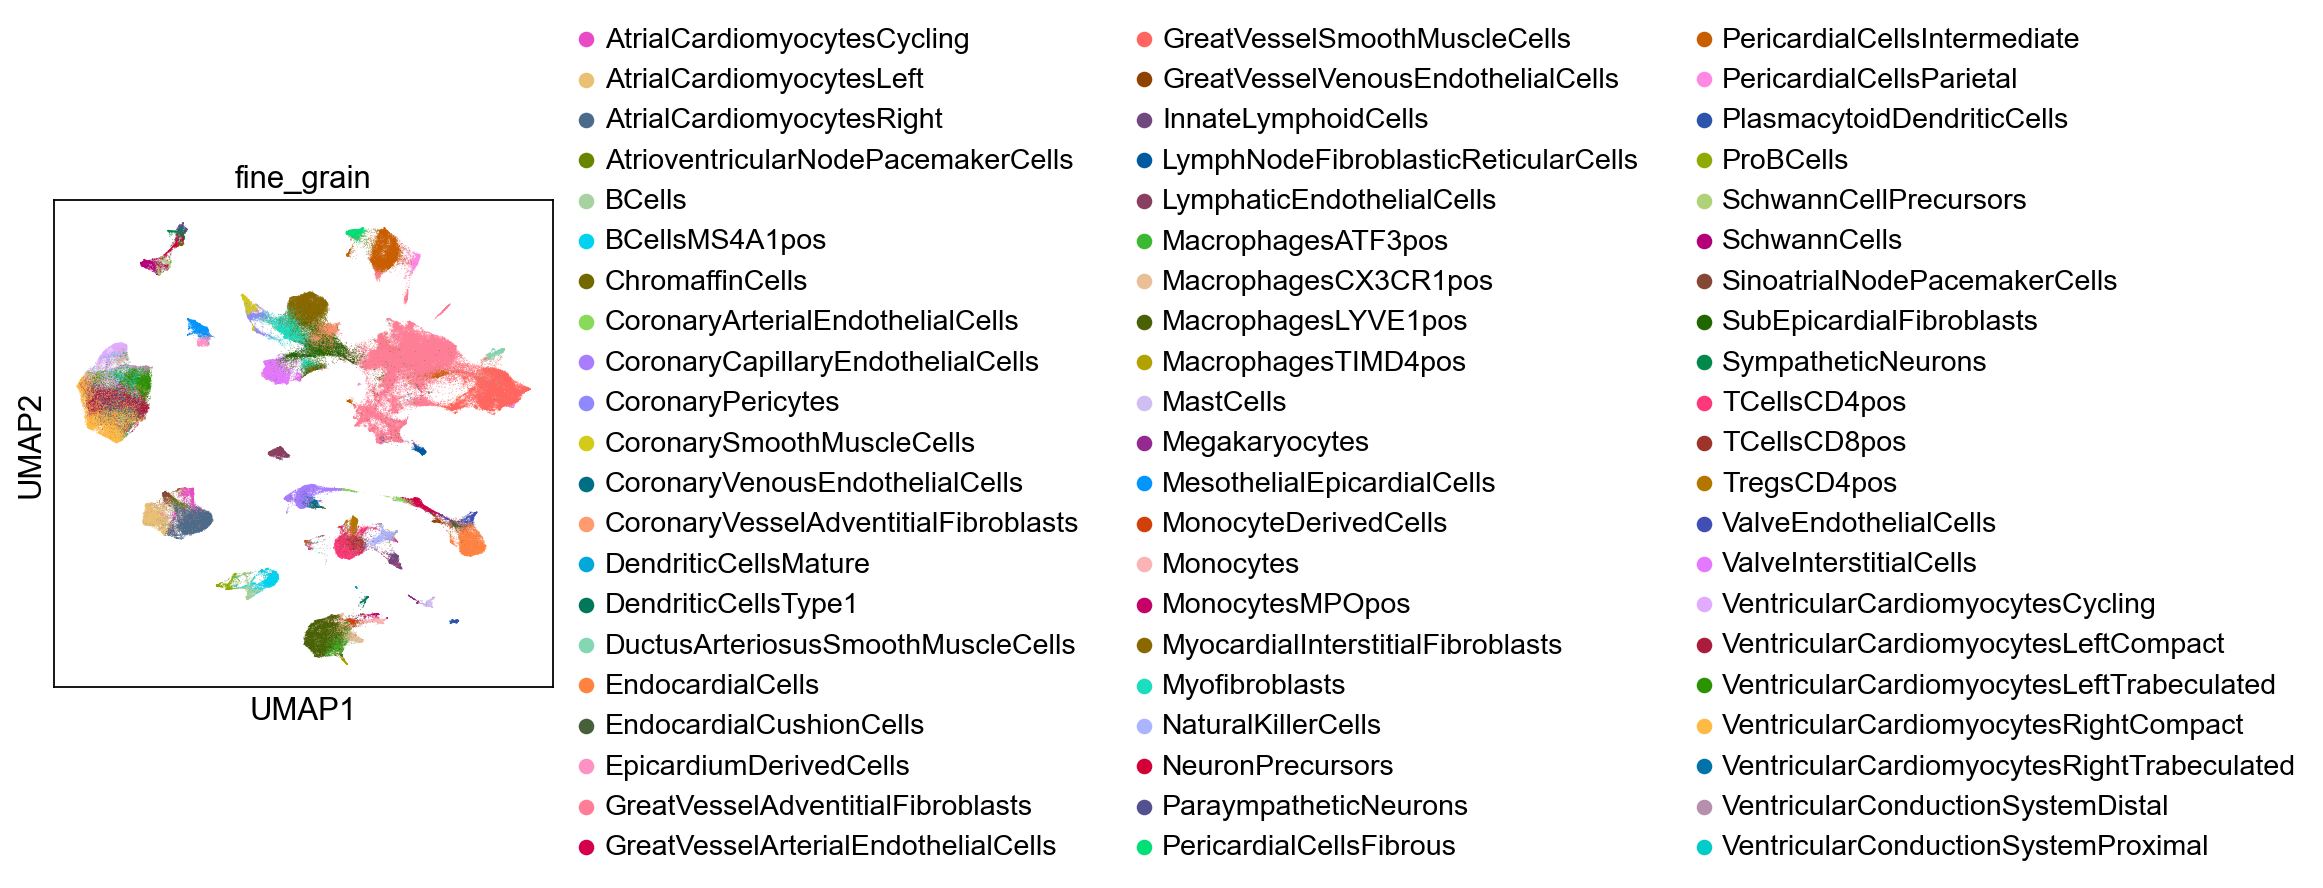

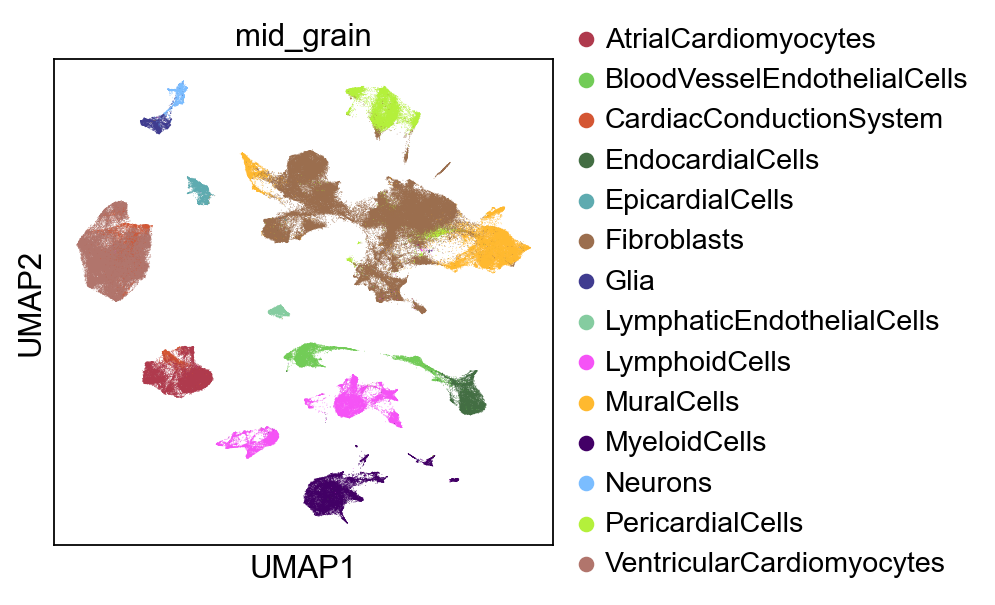

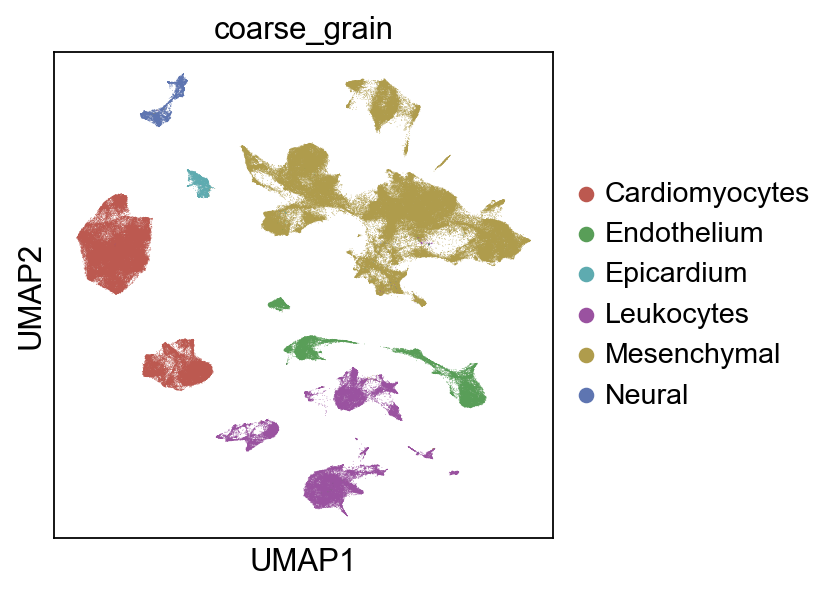

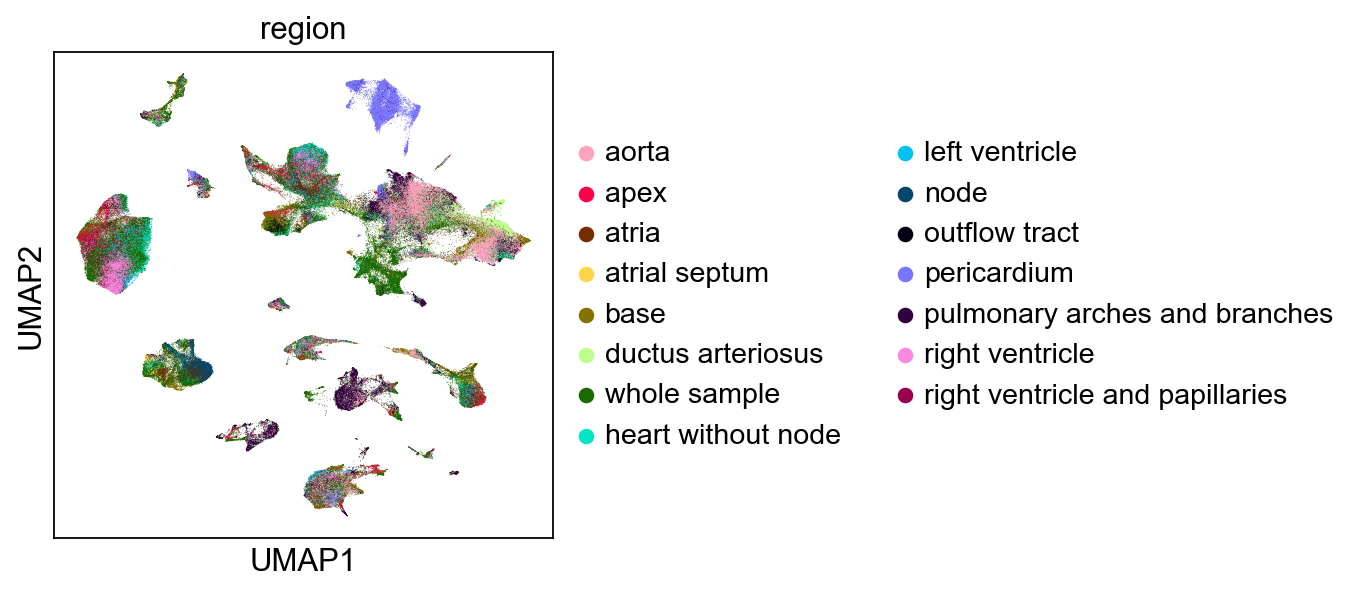

In [7]:
#Expression: "YlGn" (e.g. DE plots)
#Divergent expression: "PRGn" (e.g. log2FC)
#Age: "afmhot_r"
#Others: "viridis" (e.g. UMAP expression)

#Define color palette
FineGrainPalette={
    'AtrialCardiomyocytesLeft':'#eac075',
    'AtrialCardiomyocytesRight':'#4c6b8a',
    'AtrialCardiomyocytesCycling':'#e94bc7',
    'VentricularCardiomyocytesLeftCompact':'#ab1c3c',
    'VentricularCardiomyocytesRightCompact':'#fdba45',
    'VentricularCardiomyocytesLeftTrabeculated':'#2b9200',
    'VentricularCardiomyocytesRightTrabeculated':'#0273a8',
    'VentricularCardiomyocytesCycling':'#e1acff',
    'SinoatrialNodePacemakerCells':'#854834',
    'AtrioventricularNodePacemakerCells':'#688500',
    'VentricularConductionSystemProximal':'#01ccc8',
    'VentricularConductionSystemDistal':'#b58fab',
    'GreatVesselAdventitialFibroblasts':'#ff7e97',
    'CoronaryVesselAdventitialFibroblasts':'#ff9b6e',
    'MyocardialInterstitialFibroblasts':'#8a6800',
    'SubEpicardialFibroblasts':'#206601',
    'Myofibroblasts':'#1bdebf',
    'LymphNodeFibroblasticReticularCells':'#005aa0',
    'ValveInterstitialCells':'#e478ff',
    'GreatVesselSmoothMuscleCells':'#ff665f',
    'CoronarySmoothMuscleCells':'#d2cb18',
    'DuctusArteriosusSmoothMuscleCells':'#83d7b3',
    'CoronaryPericytes':'#9088ff',
    'PericardialCellsIntermediate':'#c95e00',
    'PericardialCellsFibrous':'#01e077',
    'PericardialCellsParietal':'#ff88e4',
    'GreatVesselArterialEndothelialCells':'#d4004b',
    'GreatVesselVenousEndothelialCells':'#8f4300',
    'CoronaryArterialEndothelialCells':'#89da5a',
    'CoronaryVenousEndothelialCells':'#006f86',
    'CoronaryCapillaryEndothelialCells':'#aa7dff',
    'EndocardialCells':'#ff8241',
    'EndocardialCushionCells':'#46603a',
    'ValveEndothelialCells':'#414eb6',
    'LymphaticEndothelialCells':'#8b3f60',
    'MesothelialEpicardialCells':'#0295fe',
    'EpicardiumDerivedCells':'#ff92c4',
    'NeuronPrecursors':'#d30038',
    'ChromaffinCells':'#726800',
    'SympatheticNeurons':'#01894b',
    'ParaympatheticNeurons':'#545191',
    'SchwannCellPrecursors':'#b0d276',
    'SchwannCells':'#b30079',
    'MonocytesMPOpos':'#c50066',
    'Monocytes':'#fab4b6',
    'MonocyteDerivedCells':'#d14008',
    'MacrophagesCX3CR1pos':'#eabe97',
    'MacrophagesTIMD4pos':'#b2a200',
    'MacrophagesLYVE1pos':'#4a6005',
    'MacrophagesATF3pos':'#3db833',
    'DendriticCellsType1':'#007859',
    'DendriticCellsMature':'#01a9db',
    'PlasmacytoidDendriticCells':'#2c54ab',
    'MastCells':'#d0bef2',
    'Megakaryocytes':'#94298f',
    'TCellsCD4pos':'#ff387c',
    'TCellsCD8pos':'#9e3429',
    'TregsCD4pos':'#b37700',
    'ProBCells':'#8dab00',
    'BCells':'#a8d1a1',
    'BCellsMS4A1pos':'#00d2f0',
    'NaturalKillerCells':'#abb4ff',
    'InnateLymphoidCells':'#72497f',
}
sc.pl.umap(adata, color='fine_grain',palette=FineGrainPalette)

MidGrainPalette={
    'AtrialCardiomyocytes':'#af3a4d',
    'VentricularCardiomyocytes':'#b1756c',
    'CardiacConductionSystem':'#d45633',
    'Fibroblasts':'#9b6e4e',
    'MuralCells':'#ffb92f',
    'PericardialCells':'#b4f03b',
    'BloodVesselEndothelialCells':'#72cc57',
    'EndocardialCells':'#436e43',
    'LymphaticEndothelialCells':'#85cca0',
    'EpicardialCells':'#5eabb0',
    'Neurons':'#7bbdff',
    'Glia':'#403c90',
    'MyeloidCells':'#420066',
    'LymphoidCells':'#f553f6',
}
sc.pl.umap(adata, color='mid_grain',palette=MidGrainPalette)

CoarseGrainPalette={
    'Cardiomyocytes':'#bc5950',
    'Mesenchymal':'#af9c4c',
    'Endothelium':'#599e58',
    'Epicardium':'#5eabb0',
    'Neural':'#5e75b1',
    'Leukocytes':'#9a52a0',
}
sc.pl.umap(adata, color='coarse_grain',palette=CoarseGrainPalette)

RegionGrainPalette={
    'aorta':'#ffa2bc',
    'apex':'#fe0049',
    'atria':'#732d00',
    'atrial septum':'#ffd54c',
    'base':'#837100',
    'ductus arteriosus':'#bdff8b',
    'whole sample':'#1b6c00',
    'heart without node':'#02e6c6',
    'left ventricle':'#01c1f5',
    'node':'#00466d',
    'outflow tract':'#020011',
    'pericardium':'#7a75ff',
    'pulmonary arches and branches':'#30003e',
    'right ventricle':'#ff88e1',
    'right ventricle and papillaries':'#98004f',
}
sc.pl.umap(adata, color='region',palette=RegionGrainPalette)

In [ ]:
#adata = adata[adata.obs['fine_grain'].isin(['CoronaryVesselAdventitialFibroblasts','MyocardialInterstitialFibroblasts1','MyocardialInterstitialFibroblasts2','Myofibroblasts','GreatVesselAdventitialFibroblasts'])].copy()
#adata = adata[adata.obs['fine_grain'].isin(['CoronaryArterialEndothelialCells','CoronaryCapillaryEndothelialCells','CoronaryVenousEndothelialCells','GreatVesselArterialEndothelialCells','GreatVesselVenousEndothelialCells'])].copy()
#adata = adata[adata.obs['fine_grain'].isin(['CoronaryPericytes','CoronarySmoothMuscleCells','DuctusArteriosusSmoothMuscleCells','GreatVesselSmoothMuscleCells'])].copy()
adata=adata[adata.obs.coarse_grain=='Cardiomyocytea',:].copy()
set(adata.obs.fine_grain)

{'AtrialCardiomyocytesCycling',
 'AtrialCardiomyocytesLeft',
 'AtrialCardiomyocytesRight',
 'AtrioventricularNodePacemakerCells',
 'SinoatrialNodePacemakerCells',
 'VentricularCardiomyocytesCycling',
 'VentricularCardiomyocytesLeftCompact',
 'VentricularCardiomyocytesLeftTrabeculated',
 'VentricularCardiomyocytesRightCompact',
 'VentricularCardiomyocytesRightTrabeculated',
 'VentricularConductionSystemDistal',
 'VentricularConductionSystemProximal'}

In [ ]:
# preserve raw count
adata.layers["counts"] = adata.X.copy()

# normalise and log-transform
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5, batch_key='batch_key')
#sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

print(sum(adata.var.highly_variable))
sc.pl.highly_variable_genes(adata)

# freeze the state in `.raw`
adata.raw = adata

# subset hvgs
adata = adata[:, adata.var.highly_variable]

adata=adata.copy()

sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)
#sc.pp.regress_out(adata, ['S_score','G2M_score'])

#batch correction
scvi.model.SCVI.setup_anndata(adata, 
                              layer="counts", 
                              batch_key="batch_key",
                              categorical_covariate_keys=['phase'],
                              continuous_covariate_keys=['total_counts','pct_counts_mt','pct_counts_ribo'])

vae = scvi.model.SCVI(adata, n_hidden = 128, n_latent = 50, n_layers = 3, dispersion = 'gene-batch')
vae.train(max_epochs=50)
    
# Convergence plot
x = np.linspace(1, (len(vae.history['elbo_train'])), (len(vae.history['elbo_train'])))
plt.plot(x, vae.history['elbo_train'], label="train")
plt.xlabel('epoch')
plt.ylabel('elbo_train')
plt.show()
plt.clf()

# add the latent space to adata
adata.obsm["X_scVI"] = vae.get_latent_representation()

sc.tl.score_genes(adata, stress_genes, score_name='stress_score')
sc.tl.score_genes(adata, hb_genes1, score_name='hb1_score')

sc.pp.neighbors(adata, use_rep="X_scVI")
sc.tl.umap(adata,min_dist=0.1)
#sc.tl.tsne(adata)
sc.pl.umap(adata, color=['log1p_total_counts','n_genes','n_genes_by_counts','total_counts','pct_counts_mt','pct_counts_ribo'],ncols=5)
sc.pl.umap(adata, color=['scrublet_score','stress_score', 'hb1_score','phase'], ncols=5,)

sc.pl.umap(adata, color=['donor','age','week','trimester','region','phase','cycling','cell_or_nuclei','modality','kit_10x','FACSgate','heart_or_greatvessels','coarse_grain','mid_grain','fine_grain'],wspace=0.8,ncols=5)
Genes=['TTN','TNNT2','MYOM1','LDB3','ALDH1A2','TNNT1','KRT19','UPK3B','BNC1','COL6A3','FBLN1','PCOLCE','LRRC17','PCDH18','EMCN','ECSCR','PECAM1','CDH5','ESAM', 'LAPTM5','PTPRC','LCP1','CD53','WAS','PHOX2B','NRXN1','STMN2','GRIK2','L1CAM']
sc.pl.umap(adata, color=Genes)

normalizing counts per cell
    finished (0:00:00)


KeyboardInterrupt: 

... storing 'type' as categorical


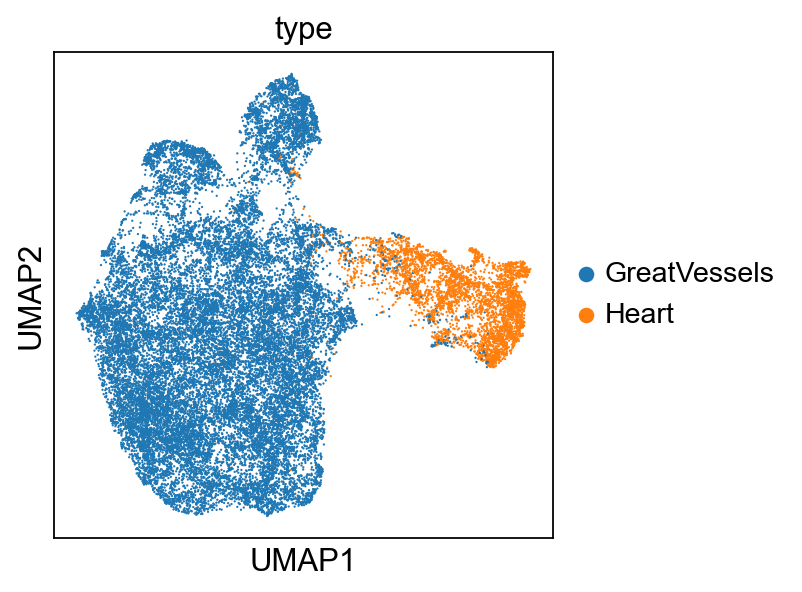

In [8]:
#Fibroblasts
#adata.obs['type']= 'na'
#adata.obs['type'][[x for x in adata.obs_names if adata.obs.fine_grain[x] in ['CoronaryVesselAdventitialFibroblasts','MyocardialInterstitialFibroblasts1','MyocardialInterstitialFibroblasts2','Myofibroblasts']]]='Heart'
#adata.obs['type'][[x for x in adata.obs_names if adata.obs.fine_grain[x] in ['GreatVesselAdventitialFibroblasts']]]='GreatVessels'
#sc.pl.umap(adata, color='type')

#Endothelium
#adata.obs['type']= 'na'
#adata.obs['type'][[x for x in adata.obs_names if adata.obs.fine_grain[x] in ['CoronaryArterialEndothelialCells','CoronaryCapillaryEndothelialCells','CoronaryVenousEndothelialCells']]]='Heart'
#adata.obs['type'][[x for x in adata.obs_names if adata.obs.fine_grain[x] in ['GreatVesselArterialEndothelialCells','GreatVesselVenousEndothelialCells']]]='GreatVessels'
#sc.pl.umap(adata, color='type')

#SmoothMuscleCells
adata.obs['type']= 'na'
adata.obs['type'][[x for x in adata.obs_names if adata.obs.fine_grain[x] in ['CoronaryPericytes','CoronarySmoothMuscleCells']]]='Heart'
adata.obs['type'][[x for x in adata.obs_names if adata.obs.fine_grain[x] in ['DuctusArteriosusSmoothMuscleCells','GreatVesselSmoothMuscleCells']]]='GreatVessels'
sc.pl.umap(adata, color='type')

In [12]:
sc.tl.rank_genes_groups(adata, 'type', method='wilcoxon', key_added = "wilcoxon")
result = adata.uns['wilcoxon']
groups = result['names'].dtype.names
df = pd.DataFrame(
{group + '_' + key[:5]: result[key][group]
for group in groups for key in ['names','scores','logfoldchanges','pvals','pvals_adj']})
df.to_csv('./FibroblastsDE.csv')

ranking genes
    finished: added to `.uns['wilcoxon']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:02:21)


In [32]:
#This box to run enrichment right away
gene_set_names = gseapy.get_library_name(organism='Human')
print(gene_set_names)

glist = sc.get.rank_genes_groups_df(adata, group='GreatVessels', 
                                    key='wilcoxon', log2fc_min=0, 
                                    pval_cutoff=1)['names'].squeeze().str.strip().tolist()
print(len(glist))

#GO_Biological_Process_2021,GO_Cellular_Component_2021,GO_Molecular_Function_2021
enr_res = gseapy.enrichr(gene_list=glist,
                     organism='Human',
                     gene_sets='GO_Biological_Process_2021',
                     cutoff = 0.5)
enr_res.results.head()

7806


## Violin plots

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


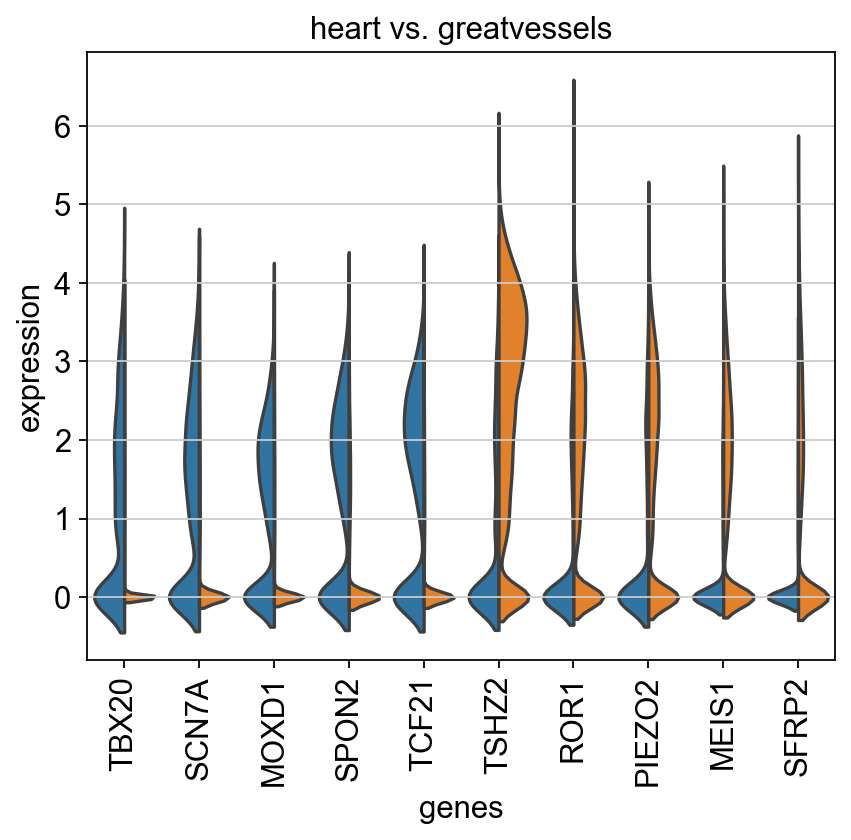

In [31]:
adata=sc.read('./ViolinPlot/FibroblastViolinFigures.h5ad')
adata = adata[adata.obs['fine_grain'].isin(['CoronaryVesselAdventitialFibroblasts','GreatVesselAdventitialFibroblasts'])].copy()
sc.tl.rank_genes_groups(adata, 'heart_or_greatvessels', groups=['heart'], reference='greatvessels', method='t-test')
plt.rcParams['figure.figsize'] = 6,5
sc.pl.rank_genes_groups_violin(adata, groups='heart',gene_names=['TBX20','SCN7A','MOXD1','SPON2','TCF21','TSHZ2','ROR1','PIEZO2','MEIS1','SFRP2'],strip=False)
#adata.write('./ViolinPlot/FibroblastViolinFigures.h5ad')

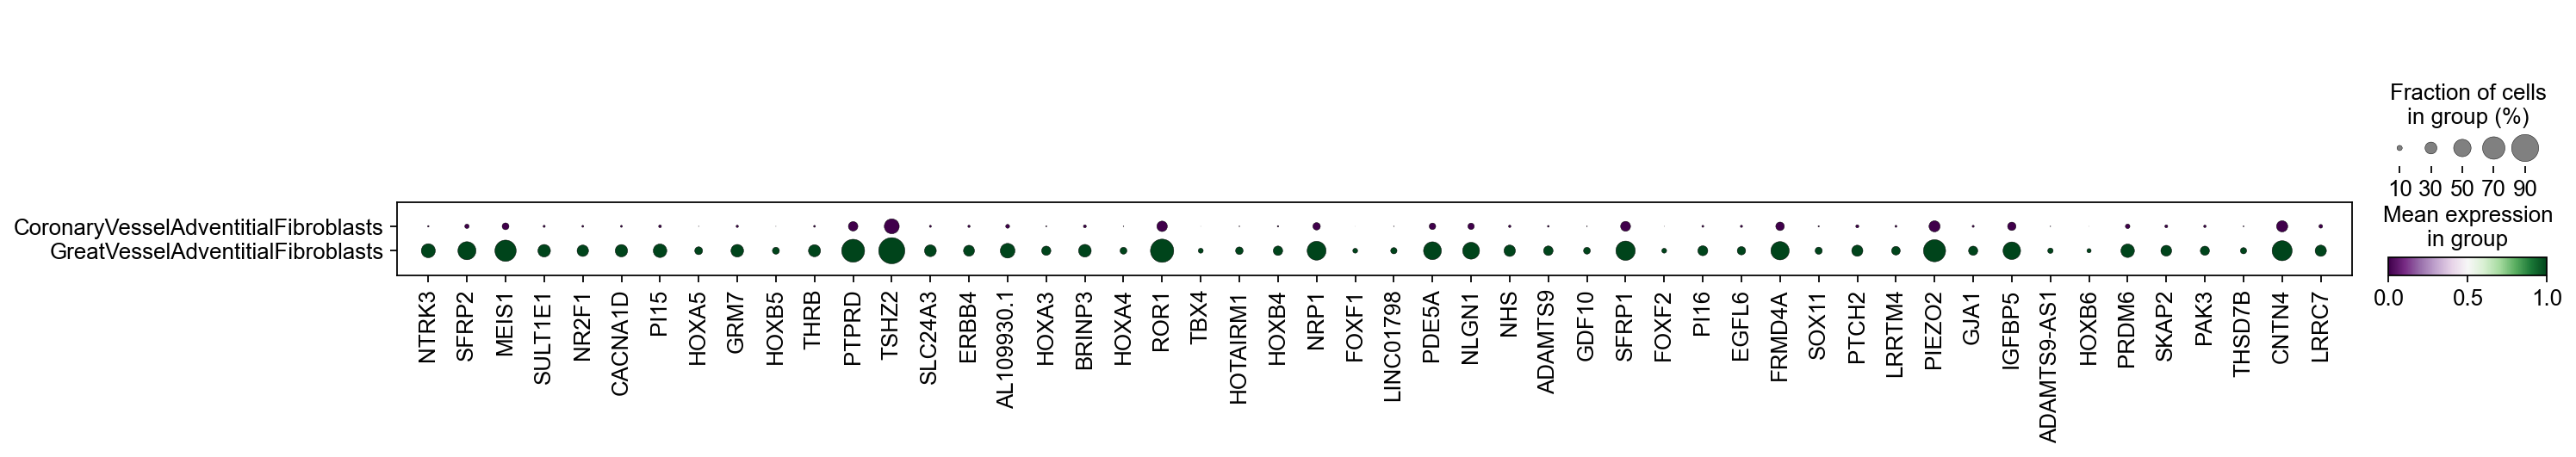

In [28]:
ClusterOfInterest='GreatVesselAdventitialFibroblasts'
#sc.tl.rank_genes_groups(adata, 'fine_grain', method='t-test', key_added = "t-test")
DEGenesForCluster = [x[ClusterOfInterest] for x in adata.uns['t-test']['names'][:50]]
sc.pl.dotplot(adata, DEGenesForCluster ,groupby='fine_grain',standard_scale='var',cmap='PRGn')
#sc.pl.umap(adata, color=DEGenesForCluster)

(28497, 1505)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


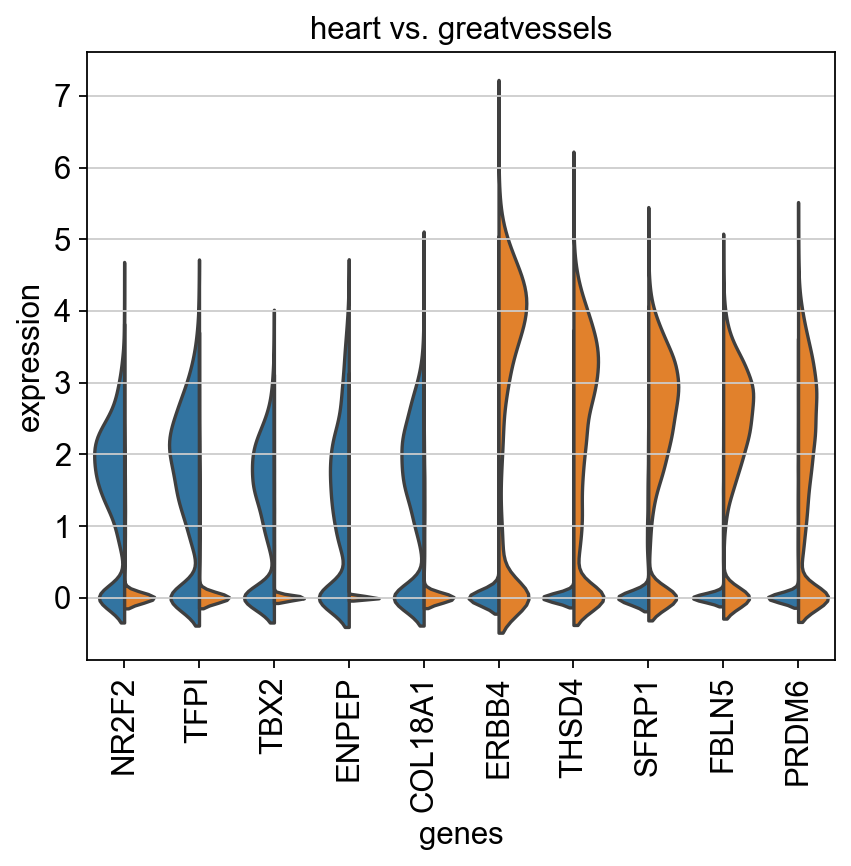

In [34]:
#Muralcells
adata=sc.read('./ViolinPlot/MuralViolinFigures.h5ad')
print(adata.shape)
sc.tl.rank_genes_groups(adata, 'heart_or_greatvessels', groups=['heart'], reference='greatvessels', method='t-test')
plt.rcParams['figure.figsize'] = 6,5
sc.pl.rank_genes_groups_violin(adata, groups='heart',gene_names=['NR2F2','TFPI','TBX2','ENPEP','COL18A1','ERBB4','THSD4','SFRP1','FBLN5','PRDM6'],strip=False)
#adata.write('./ViolinPlot/MuralViolinFigures.h5ad')

(11352, 1634)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


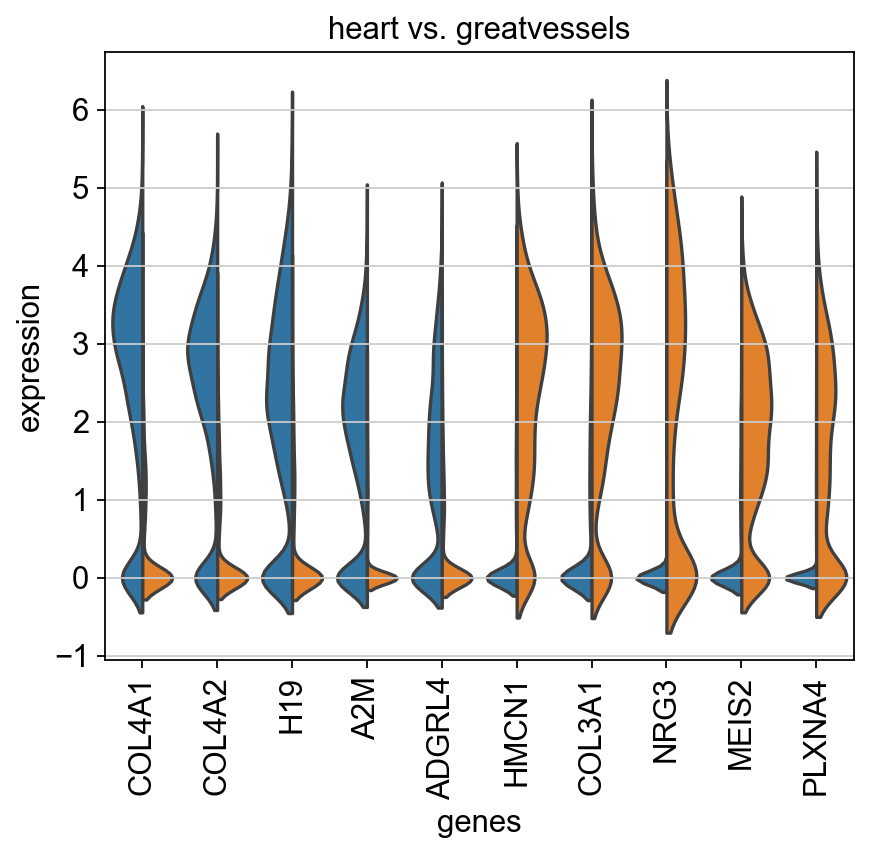

In [35]:
#Endothelial
adata=sc.read('./ViolinPlot/EndothelialViolinFigures.h5ad')
print(adata.shape)
sc.tl.rank_genes_groups(adata, 'heart_or_greatvessels', groups=['heart'], reference='greatvessels', method='t-test')
plt.rcParams['figure.figsize'] = 6,5
sc.pl.rank_genes_groups_violin(adata, groups='heart',gene_names=['COL4A1','COL4A2','H19','A2M','ADGRL4','HMCN1','COL3A1','NRG3','MEIS2','PLXNA4'],strip=False)
#adata.write('./ViolinPlot/EndothelialViolinFigures.h5ad')